Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import keras
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D,Input,LeakyReLU
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from sklearn import svm
from keras.preprocessing import image
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
Importing the train data:

In [1]:
!gdown --id 1saZ-xa27Sr8iWOjh9qy5HPwgu1GHRki8&export=download

Downloading...
From: https://drive.google.com/uc?id=1saZ-xa27Sr8iWOjh9qy5HPwgu1GHRki8
To: /content/Part 1- Train data - images.npy
1.36GB [00:11, 120MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import keras
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D,Input,LeakyReLU
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from sklearn import svm
from keras.preprocessing import image
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
%matplotlib inline

Loading the imported data into an array:

In [3]:
data=np.load('Part 1- Train data - images.npy',allow_pickle=True)

In [8]:
data.shape

(409, 2)

In [12]:
data[1][1]

[{'imageHeight': 697,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}]}]

In [4]:
IMAGE_WIDTH = 224   
IMAGE_HEIGHT = 224

In [5]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

In [ ]:
data[272][0].shape

(350, 650)

In [ ]:
for i in range(0,len(data)):
  #print(i)
  if len(data[i][0].shape)==3:
    if data[i][0].shape[2]!=3:
      print(data[i][0].shape[2])
  if len(data[i][0].shape)==2:
    print(i)
    print(data[i][0].shape)


4
4
4
4
4
4
4
4
4
272
(350, 650)
4
4


In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
X_train2 = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(272,273):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X_train2[0] = preprocess_input(np.array(img, dtype=np.float32))

In [ ]:
X_train2[0].shape

(224, 224, 3)

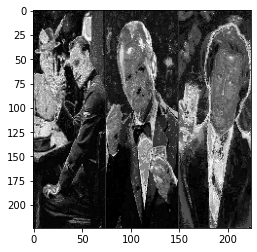

In [ ]:
plt.imshow(X_train1[272])

In [ ]:
mask = np.zeros([image_height, image_width], dtype='float32')
for i in range(len(bboxes)):
     bbox = bboxes[i]
     x0, x1 = int(bbox[1]), int(bbox[3])
     y0, y1 = int(bbox[0]), int(bbox[2])
     mask[x0:x1, y0:y1] = 1

Preprocessing the image data and saving the input and output masks in separate arrays:
i)All the input images are resized and reshaped to a uniform shape of (224,224,3) regardless of whether they are 4-channel,3-channel or 1-channel images.
ii)The bounding box coordinates are scaled up as per the required image height and widths and the binary masks are created using these coordinates where mask pixels are set to 1 while the rest of the pixels are set to 0.

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train1 = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    if len(img.shape)==3:
      
      if img.shape[2]==4:
        img=cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
      X_train1[index] = np.array(img, dtype=np.float32)/255
    if len(img.shape)==2:
      X_train1[index][:,:,0] = np.array(img, dtype=np.float32)/255
      X_train1[index][:,:,1] = np.array(img, dtype=np.float32)/255
      X_train1[index][:,:,2] = np.array(img, dtype=np.float32)/255
    
    
    #X_train1[index] = np.array(img, dtype=np.float32)/255
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

Displaying a few samples of the reshaped images and their respective masks:

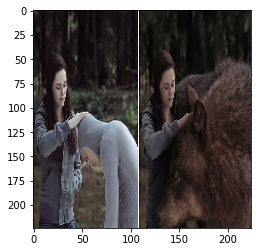

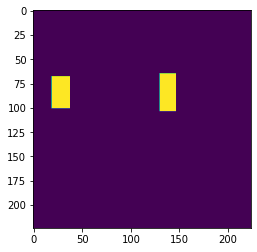

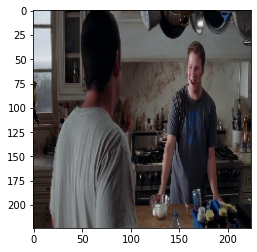

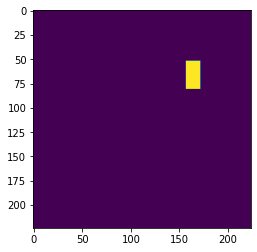

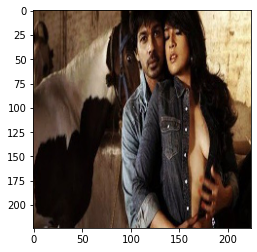

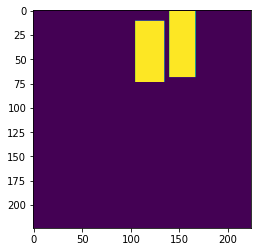

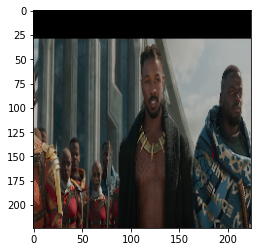

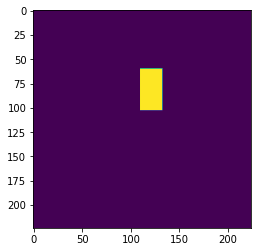

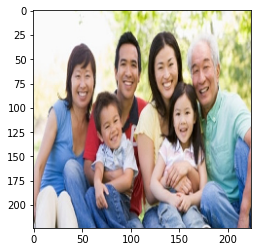

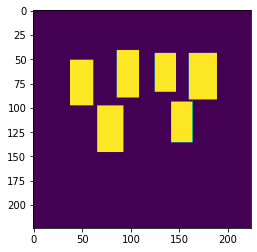

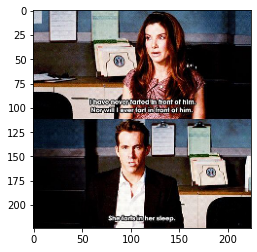

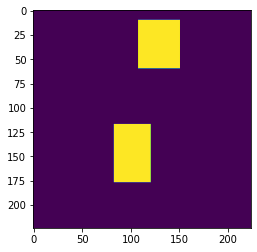

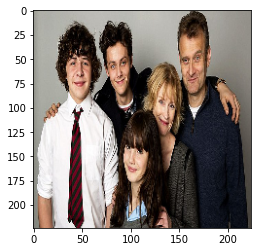

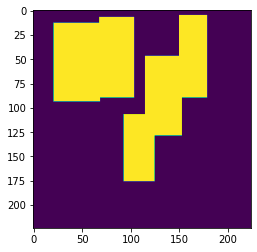

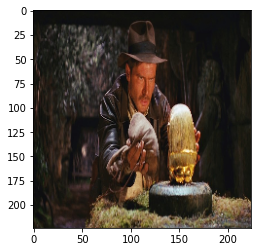

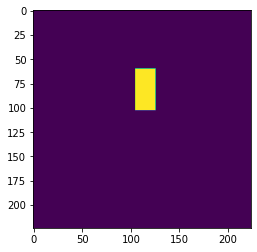

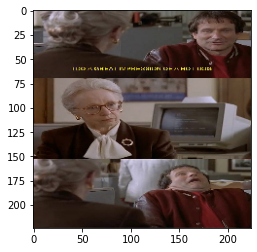

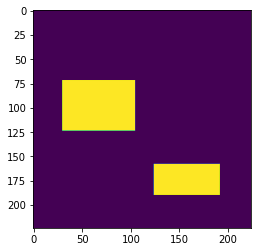

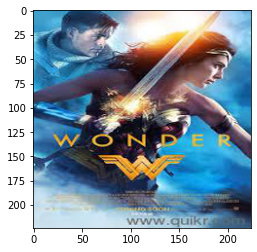

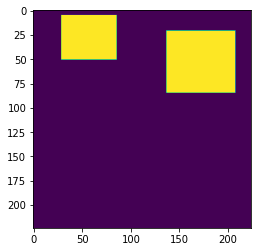

In [7]:
for i in range(0,10):
  plt.imshow(X_train1[i])
  plt.show()
  plt.imshow(masks[i])
  plt.show()

Splitting the input into train and test data respectively for later use:

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X_train1,masks,test_size=0.1,random_state=42)

In [29]:
x_val,x_test1,y_val,y_test1=train_test_split(x_test,y_test,test_size=0.1,random_state=42)

In [ ]:
len(x_test)

41

In [ ]:
masks1 = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH),dtype=np.uint8)

In [ ]:
for i in data[0][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks1[0][y1:y2, x1:x2] = 1

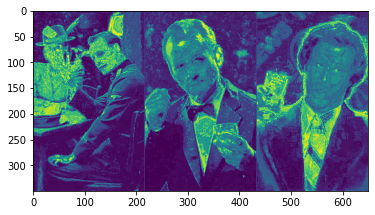

In [ ]:
plt.imshow(data[272][0])

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape,Dropout,MaxPooling2D
from tensorflow.keras.models import Model

Creating the U-Net Architecture using Mobilenet as the pretrained transfer learning model:
i)Here the top layers of the transfer learning model are non trainable while the bottom layers are trainable.
ii) The downsampled activation layers following convolution are  upsampled and concatenated in order to obtain the u net architecture and obtain the original features that are lost while using maxpooling and other downsampling methods.

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
     #### code added below ####
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### code added below ####

    # Since mask size is 224 (same as input), we need to concatenate it back all 6 layers, i.e layers of sizes 7,14,28,56,112 & 224, bottom onwards
    block1 = model.get_layer("input_1").output         #224
    block2 = model.get_layer("conv_pw_1_relu").output  #112
    block3 = model.get_layer("conv_pw_3_relu").output  #56
    block4 = model.get_layer("conv_pw_5_relu").output  #28
    block5 = model.get_layer("conv_pw_11_relu").output #14
    block6 = model.get_layer("conv_pw_13_relu").output #7

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
 
    # Add new top layer which is an sigmoid activation layer that gives 1 or 0 depending on inside/outside the face
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
 
    return Model(inputs=model.input, outputs=x)

In [ ]:

# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(trainable=True)

# Print summary
model.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
_____________________________

Defining the dice coefficient and loss for the network:
The dice coefficient follows the standard definition for dice coefficient(2*intersection/union) while the loss combines the binary crossentropy and the dice coefficient loss.

In [8]:
def dice_coefficient(y_true, y_pred):
    #### code added below ####
    import tensorflow
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [9]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

Compiling the model using adam optimizer and saving the best model using checkpoint and early stopping. The reduce lr on plateau is used to reduce the learning rate when there in no improvement in the loss.

In [48]:
from keras.optimizers import Adam

#optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
optimizer = Adam(lr=1e-3)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

In [49]:
optimizer = Adam(lr=1e-4)
model.compile(loss=loss, optimizer='rmsprop', metrics=[dice_coefficient])

In [70]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

Fitting the data using the model and training it:

In [ ]:
model.fit(x=X_train,y=masks,
          epochs=20, batch_size=1,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True, verbose=1)

Epoch 1/20
409/409 [==============================] - 60s 64ms/step - loss: 1.3986 - dice_coefficient: 0.4399

Epoch 00001: loss improved from inf to 1.39858, saving model to model-1.40.h5
Epoch 2/20
409/409 [==============================] - 26s 64ms/step - loss: 0.8035 - dice_coefficient: 0.6094

Epoch 00002: loss improved from 1.39858 to 0.80349, saving model to model-0.80.h5
Epoch 3/20
409/409 [==============================] - 26s 64ms/step - loss: 0.6431 - dice_coefficient: 0.6694

Epoch 00003: loss improved from 0.80349 to 0.64312, saving model to model-0.64.h5
Epoch 4/20
409/409 [==============================] - 26s 64ms/step - loss: 0.5676 - dice_coefficient: 0.7005

Epoch 00004: loss improved from 0.64312 to 0.56756, saving model to model-0.57.h5
Epoch 5/20
409/409 [==============================] - 26s 64ms/step - loss: 0.5177 - dice_coefficient: 0.7216

Epoch 00005: loss improved from 0.56756 to 0.51773, saving model to model-0.52.h5
Epoch 6/20
409/409 [===================

Varying the previously defined unet architecture through addition of convolution layers following the upsampling of the various layers in order to capture essential features of the upsampled layers: 

In [ ]:
#inputs = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), name="input_image")
encoder = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), weights="imagenet", include_top=False, alpha=1.0)

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
encoder.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [ ]:
skip_connection_names = ["input_1", "conv_pw_1_relu", "conv_pw_3_relu", "conv_pw_5_relu","conv_pw_11_relu"]

In [ ]:
encoder_output = encoder.get_layer("conv_pw_13_relu").output

In [ ]:
 f = [16, 32, 48, 64,80]

In [ ]:
from tensorflow.keras import layers

In [ ]:
encoder_output = encoder.get_layer("conv_pw_13_relu").output
skip_connection_names = ["input_1", "conv_pw_1_relu", "conv_pw_3_relu", "conv_pw_5_relu","conv_pw_11_relu"]
f = [16, 32, 48, 64,80]
encoder_output = encoder.get_layer("conv_pw_13_relu").output
x = encoder_output
for i in range(1, len(skip_connection_names)+1, 1):
    x_skip = encoder.get_layer(skip_connection_names[-i]).output
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    x = Concatenate()([x, x_skip])
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
x = Conv2D(1, (1, 1), padding="same")(x)
x = Activation("sigmoid")(x)
x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    
model = Model(inputs=encoder.input, outputs=x)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 24) 648         input_3[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 24) 96          conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 24) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

Fitting the data using the above defined network and training it:

In [ ]:
model.fit(x=X_train1,y=masks,
          epochs=20, batch_size=1,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True, verbose=1)

Epoch 1/20
409/409 [==============================] - 41s 19ms/step - loss: 1.1982 - dice_coefficient: 0.4693

Epoch 00001: loss improved from inf to 1.19822, saving model to model-1.20.h5
Epoch 2/20
409/409 [==============================] - 8s 19ms/step - loss: 0.8174 - dice_coefficient: 0.5988

Epoch 00002: loss improved from 1.19822 to 0.81742, saving model to model-0.82.h5
Epoch 3/20
409/409 [==============================] - 8s 19ms/step - loss: 0.6691 - dice_coefficient: 0.6568

Epoch 00003: loss improved from 0.81742 to 0.66915, saving model to model-0.67.h5
Epoch 4/20
409/409 [==============================] - 8s 19ms/step - loss: 0.5684 - dice_coefficient: 0.6988

Epoch 00004: loss improved from 0.66915 to 0.56843, saving model to model-0.57.h5
Epoch 5/20
409/409 [==============================] - 8s 19ms/step - loss: 0.4525 - dice_coefficient: 0.7484

Epoch 00005: loss improved from 0.56843 to 0.45250, saving model to model-0.45.h5
Epoch 6/20
409/409 [=======================

From the above data it can be seen that the dice coefficient improves to 0.90 from 0.8 when trained using the same number of 20 epochs.

Loading the test image:

In [ ]:
predict_img=cv2.imread('/content/Part 1Test Data - Prediction Image.jpeg')

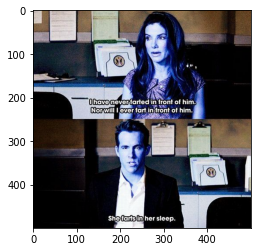

In [ ]:
plt.imshow(predict_img)

Resizing and reshaping the test image as per the model input requirements:

In [ ]:
X_test = np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = predict_img
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    if len(img.shape)==3:
      
      if img.shape[2]==4:
        img=cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
      X_test[0] = np.array(img, dtype=np.float32)/255

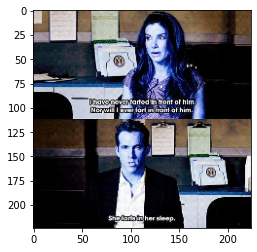

In [ ]:
plt.imshow(X_test[0])

In [ ]:
X_test[0].shape

(224, 224, 3)

In [ ]:
from keras.models import load_model

Predicting the mask label for the test image:

In [ ]:
y_pred=model.predict(X_test)

Reshaping and displaying the predicted mask:

In [ ]:
y_pred1=y_pred.reshape(224,224)

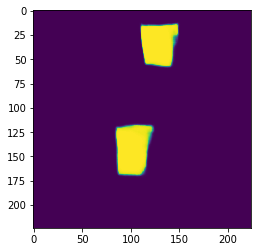

In [ ]:
plt.imshow(y_pred1)

Creating binary mask by setting predicted pixel values greater than 0.9 to 1 and the rest to 0:

In [ ]:
y_pred1[y_pred1>0.9]

array([0.90658534, 0.950594  , 0.9546297 , ..., 0.9438594 , 0.93865144,
       0.9321131 ], dtype=float32)

In [ ]:
y_pred2=y_pred1.copy()

In [ ]:
y_pred2[y_pred2>=0.9]=1
y_pred2[y_pred2<0.9]=0

Displaying the binary mask:

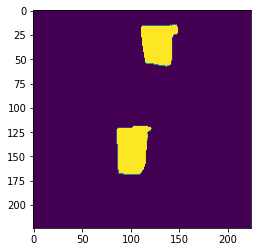

In [ ]:
plt.imshow(y_pred2)

In [ ]:
y_pred2=y_pred2.astype('uint8')

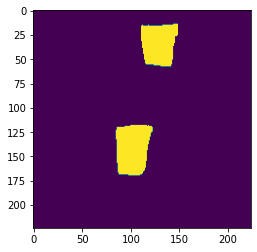

In [ ]:
plt.imshow(y_pred2)

Using bitwise and operator of OpenCV to display the faces corresponding to the masks that have been predicted:

In [ ]:
output=cv2.bitwise_and(X_test[0],X_test[0],mask=y_pred2)

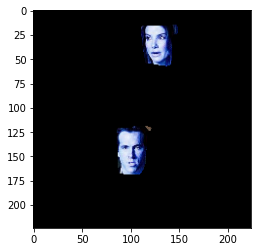

In [ ]:
plt.imshow(output)

Fitting the model using validation data to evaluate the model while training:

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),
          epochs=50, batch_size=3,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True, verbose=1,shuffle=True)

Epoch 1/50
123/123 [==============================] - 11s 58ms/step - loss: 1.4242 - dice_coefficient: 0.3936 - val_loss: 0.8139 - val_dice_coefficient: 0.5876

Epoch 00001: loss improved from inf to 1.42421, saving model to model-1.42.h5
Epoch 2/50
123/123 [==============================] - 6s 48ms/step - loss: 0.7871 - dice_coefficient: 0.6033 - val_loss: 0.8806 - val_dice_coefficient: 0.5616

Epoch 00002: loss improved from 1.42421 to 0.78707, saving model to model-0.79.h5
Epoch 3/50
123/123 [==============================] - 6s 48ms/step - loss: 0.6302 - dice_coefficient: 0.6681 - val_loss: 0.6430 - val_dice_coefficient: 0.6620

Epoch 00003: loss improved from 0.78707 to 0.63024, saving model to model-0.63.h5
Epoch 4/50
123/123 [==============================] - 6s 49ms/step - loss: 0.5741 - dice_coefficient: 0.6921 - val_loss: 0.8837 - val_dice_coefficient: 0.5964

Epoch 00004: loss improved from 0.63024 to 0.57408, saving model to model-0.57.h5
Epoch 5/50
123/123 [===============

As seen in the training above, the training dice coefficient increases more than 0.9 while the validation dice coefficient does not show much improvement while training and continues to remain in the range of 0.6 to 0.7. This could be due to lack of sufficient training data and validation data.

In [ ]:
y_train_pred=model.predict(x_train)

In [ ]:
dice_coefficient(y_train_pred,y_train)

<tf.Tensor: shape=(), dtype=float64, numpy=0.7698041093521356>

In [ ]:
WEIGHTS_FILE = "/content/model-0.05.h5"
THRESHOLD = 0.8
EPSILON = 0.02


model.load_weights(WEIGHTS_FILE)

In [ ]:
model.evaluate(x_train,y_train)

12/12 [==============================] - 2s 148ms/step - loss: 0.0990 - dice_coefficient: 0.9426


[0.09898259490728378, 0.9425923228263855]

Evaluating the above trained model:
A dice coefficient of 0.74 is obtained.

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 2s 468ms/step - loss: 0.7395 - dice_coefficient: 0.7452


[0.7395297288894653, 0.7451627254486084]

Predicting and displaying the mask for a sample test image:

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred1=y_pred.reshape(y_pred.shape[0],224,224)

In [ ]:
y_test1=y_test.reshape(y_test.shape[0],224,224)

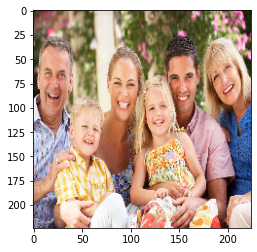

In [ ]:
plt.imshow(x_test[0])

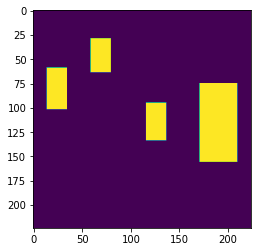

In [ ]:
plt.imshow(y_test1[1])

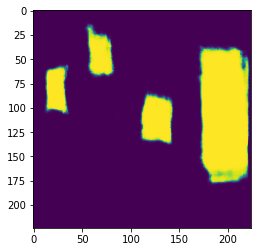

In [ ]:
plt.imshow(y_pred1[1])

In [ ]:
encoder = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), weights="imagenet", include_top=False)

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
encoder.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [ ]:
encoder_output = encoder.get_layer("conv_pw_13_relu").output

In [ ]:
skip_connection_names = [ "conv_pw_1_relu", "conv_pw_3_relu", "conv_pw_5_relu","conv_pw_11_relu"]
f = [ 32, 64,128,256]

In [ ]:

#encoder_output = encoder.get_layer("conv5_block3_out").output
x = encoder_output
for i in range(1, len(skip_connection_names)+1, 1):
    x_skip = encoder.get_layer(skip_connection_names[-i]).output
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    x = Concatenate()([x, x_skip])
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
x = Conv2D(1, (1, 1), padding="same")(x)
x = Activation("sigmoid")(x)
x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    
model = Model(inputs=encoder.input, outputs=x)

ValueError: ignored

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),
          epochs=50, batch_size=3,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True, verbose=1,shuffle=True)

Epoch 1/50
123/123 [==============================] - 45s 74ms/step - loss: 1.3516 - dice_coefficient: 0.3945 - val_loss: 1.5947 - val_dice_coefficient: 0.3377

Epoch 00001: loss improved from inf to 1.35157, saving model to model-1.35.h5
Epoch 2/50
123/123 [==============================] - 7s 56ms/step - loss: 0.7648 - dice_coefficient: 0.6129 - val_loss: 0.6669 - val_dice_coefficient: 0.6205

Epoch 00002: loss improved from 1.35157 to 0.76484, saving model to model-0.76.h5
Epoch 3/50
123/123 [==============================] - 7s 56ms/step - loss: 0.6450 - dice_coefficient: 0.6626 - val_loss: 0.7473 - val_dice_coefficient: 0.6009

Epoch 00003: loss improved from 0.76484 to 0.64498, saving model to model-0.64.h5
Epoch 4/50
123/123 [==============================] - 7s 57ms/step - loss: 0.5326 - dice_coefficient: 0.7081 - val_loss: 0.8028 - val_dice_coefficient: 0.6018

Epoch 00004: loss improved from 0.64498 to 0.53260, saving model to model-0.53.h5
Epoch 5/50
123/123 [===============

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 4s 1s/step - loss: 0.9384 - dice_coefficient: 0.6909


[0.9384157061576843, 0.6908529996871948]

In [4]:
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
!pip install efficientnet

     |████████████████████████████████| 51kB 4.2MB/s 


In [ ]:
!pip install -U efficientnet==0.0.4

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp37-none-any.whl size=14287 sha256=88858566246269238604ef73b584fcf8bbddbba2b7213c7fb04dd716cb00f715
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet


In [ ]:
from tensorflow import keras

In [10]:
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
#from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
#from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image


In [ ]:
import efficientnet.model as eff

ImportError: ignored

In [ ]:
%tensorflow_version 2.x

Using data augmentation for in order to generate more training samples for the network:

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
y_train1=y_train.reshape(y_train.shape[0],IMAGE_HEIGHT,IMAGE_WIDTH,1)
y_test1=y_test.reshape(y_test.shape[0],IMAGE_HEIGHT,IMAGE_WIDTH,1)

In [31]:
y_val1=y_val.reshape(y_val.shape[0],128,128,1)

Creating variations in the input using width shift,height shift and zooming:

In [21]:
data_gen_args = dict(#featurewise_center=True,
                     #featurewise_std_normalization=True,
                     #rotation_range=10.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     #horizontal_flip=True
                     zoom_range=0.05
                     ) 
image_datagen = ImageDataGenerator(**data_gen_args) 
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods seed = 1 
image_datagen.fit(x_train, augment=True, seed=1) 
mask_datagen.fit(y_train1, augment=True, seed=1)



In [22]:
image_generator = image_datagen.flow(
    x_train,
    
    seed=1)

mask_generator = mask_datagen.flow(
    y_train1,
    
    seed=1)

# combine generators into one which yields image and masks 
train_generator = zip(image_generator, mask_generator)



In [32]:
image_datagen.fit(x_val, augment=True, seed=1) 
mask_datagen.fit(y_val1, augment=True, seed=1)


In [33]:
image_generator1 = image_datagen.flow(
    x_val,
    
    seed=1)

mask_generator1 = mask_datagen.flow(
    y_val1,
    
    seed=1)

# combine generators into one which yields image and masks 
val_generator = zip(image_generator1, mask_generator1)


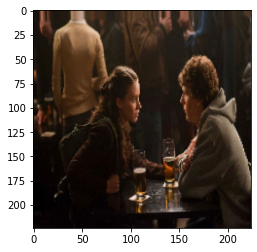

In [ ]:
plt.imshow(image_generator[0][0])

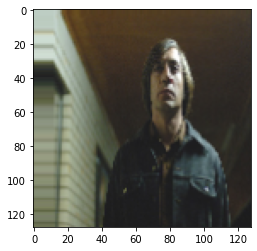

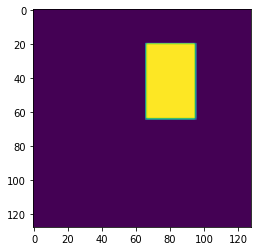

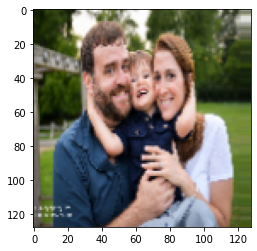

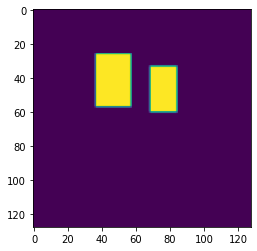

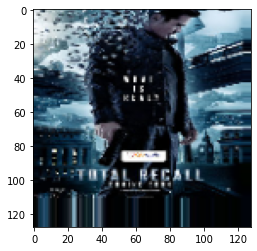

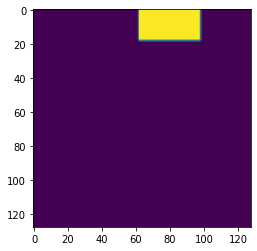

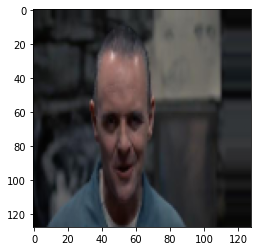

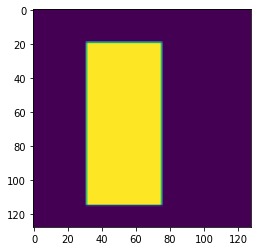

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f0d3e341950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


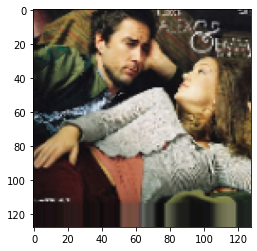

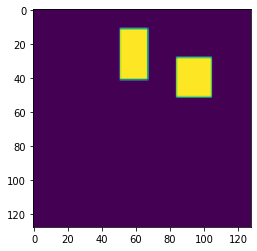

KeyboardInterrupt: ignored

In [ ]:
for img,mask in train_generator:
  plt.imshow(img[0])
  plt.show()
  mask2=mask[0].reshape(128,128)
  plt.imshow(mask2)
  plt.show()
  

In [ ]:
list(train_generator)

KeyboardInterrupt: ignored

Fitting the augmented data using the model and training on these samples:

In [ ]:
model.fit(
    train_generator,steps_per_epoch=500,validation_data=(x_test,y_test1),
    epochs=10)

Epoch 1/10
500/500 [==============================] - 102s 163ms/step - loss: 0.5163 - dice_coefficient: 0.7349 - val_loss: 0.7902 - val_dice_coefficient: 0.6816
Epoch 2/10
500/500 [==============================] - 79s 159ms/step - loss: 0.2036 - dice_coefficient: 0.8779 - val_loss: 0.8067 - val_dice_coefficient: 0.6939
Epoch 3/10
500/500 [==============================] - 79s 158ms/step - loss: 0.1507 - dice_coefficient: 0.9078 - val_loss: 0.8636 - val_dice_coefficient: 0.6895
Epoch 4/10
500/500 [==============================] - 79s 157ms/step - loss: 0.1214 - dice_coefficient: 0.9251 - val_loss: 0.9018 - val_dice_coefficient: 0.6975
Epoch 5/10
500/500 [==============================] - 78s 157ms/step - loss: 0.1033 - dice_coefficient: 0.9359 - val_loss: 0.9109 - val_dice_coefficient: 0.6992
Epoch 6/10
500/500 [==============================] - 79s 158ms/step - loss: 0.0932 - dice_coefficient: 0.9420 - val_loss: 0.9083 - val_dice_coefficient: 0.7125
Epoch 7/10
500/500 [=============

From the above training, a slight improvement in the validation dice coefficient can be seen while training the network as compared to before.

In [ ]:
model.evaluate(x_test,y_test1)

2/2 [==============================] - 0s 13ms/step - loss: 0.9550 - dice_coefficient: 0.7202


[0.9549640417098999, 0.720220685005188]

Using CNN instead of pretrained transfer learning architecture:

In [ ]:
from tensorflow.keras.layers import Activation, Lambda, GlobalAveragePooling2D, concatenate

In [ ]:
in1 = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3 ))

conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)

conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)

up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
conv6 = Dropout(0.2)(conv6)
conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
conv7 = Dropout(0.2)(conv7)
conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
segmentation = Conv2D(1, (1, 1), activation='sigmoid', name='seg')(conv7)

model = Model(inputs=[in1], outputs=[segmentation])

The following Variables were used a Lambda layer's call (tf.nn.convolution_41), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_41/kernel:0' shape=(3, 3, 3, 32) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.bias_add_41), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_41/bias:0' shape=(32,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.convolution_42), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_42/kernel:0' shape=(3, 3, 32, 32) dtype=float32>
It is possible that this is inten

Fitting the image generator data using the model:

In [ ]:
model.fit(
    train_generator,steps_per_epoch=500,validation_data=(x_test,y_test1),
    epochs=10,callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/10
500/500 [==============================] - 64s 126ms/step - loss: 2.3213 - dice_coefficient: 0.1972 - val_loss: 2.2689 - val_dice_coefficient: 0.2120

Epoch 00001: loss improved from inf to 2.32126, saving model to model-2.32.h5
Epoch 2/10
500/500 [==============================] - 63s 126ms/step - loss: 2.3225 - dice_coefficient: 0.1969 - val_loss: 2.2689 - val_dice_coefficient: 0.2120

Epoch 00002: loss did not improve from 2.32126
Epoch 3/10
115/500 [=====>........................] - ETA: 48s - loss: 2.3186 - dice_coefficient: 0.1980

KeyboardInterrupt: ignored

The training has been interrupted as seen above due to poor performance and no improvement in the training dice coefficient.

In [1]:
%tensorflow_version 1.5

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [30]:
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD

ImportError: ignored

Training on the given dataset using efficient net:

In [ ]:
!pip install -U efficientnet==0.0.4

  Created wheel for efficientnet: filename=efficientnet-0.0.4-cp37-none-any.whl size=14287 sha256=2216a6a1131c392c4ff3fdf03b0fa75cb34ff3051efac7a6f055f4b60d2334de
  Stored in directory: /root/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet


Using Snapshot ensembling technique and cosine anealing for obtaining cyclic learning rates in order to perform stochastic weight averaging:

In [ ]:
class SnapshotCallbackBuilder:
    def __init__(self, nb_epochs, nb_snapshots, init_lr=0.1):
        self.T = nb_epochs
        self.M = nb_snapshots
        self.alpha_zero = init_lr

    def get_callbacks(self, model_prefix='Model'):

        callback_list = [
            callbacks.ModelCheckpoint("./keras.model",monitor='val_my_iou_metric', 
                                   mode = 'max', save_best_only=True, verbose=1),
            swa,
            callbacks.LearningRateScheduler(schedule=self._cosine_anneal_schedule)
        ]

        return callback_list

    def _cosine_anneal_schedule(self, t):
        cos_inner = np.pi * (t % (self.T // self.M))  # t - 1 is used when t has 1-based indexing.
        cos_inner /= self.T // self.M
        cos_out = np.cos(cos_inner) + 1
        return float(self.alpha_zero / 2 * cos_out)

In [ ]:
from efficientnet import EfficientNetB4

Using TensorFlow backend.


In [55]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 12.3MB/s 
     |████████████████████████████████| 15.3MB 335kB/s 
ERROR: lucid 0.3.10 requires umap-learn, which is not installed.
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.
ERROR: lucid 0.3.10 has requirement numpy<=1.19, but you'll have numpy 1.20.3 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: six 1.15.0
    Uninstall

Using EfficientB4 pretrained transfer learning model using image net weights:

In [ ]:
backbone = EfficientNetB4(weights='imagenet',
                            include_top=False,
                            input_shape=(128,128,3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Generating the summary of the model:

In [ ]:
backbone.summary()

Model: "efficientnet-b4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 48)   1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 48)   192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 64, 64, 48)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________

Adding the convolution and residual blocks in order to perform downsampling and upsampling:

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

In [ ]:
dropout_rate=0.5
input = backbone.input
start_neurons = 8

conv4 = backbone.layers[342].output
conv4 = LeakyReLU(alpha=0.1)(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)
pool4 = Dropout(dropout_rate)(pool4)

  # Middle
convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same",name='conv_middle')(pool4)
convm = residual_block(convm,start_neurons * 32)
convm = residual_block(convm,start_neurons * 32)
convm = LeakyReLU(alpha=0.1)(convm)

deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
deconv4_up1 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4)
deconv4_up2 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up1)
deconv4_up3 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(deconv4_up2)
uconv4 = concatenate([deconv4, conv4])
uconv4 = Dropout(dropout_rate)(uconv4) 

uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
uconv4 = residual_block(uconv4,start_neurons * 16)
#     uconv4 = residual_block(uconv4,start_neurons * 16)
uconv4 = LeakyReLU(alpha=0.1)(uconv4)  #conv1_2

deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
deconv3_up1 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3)
deconv3_up2 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(deconv3_up1)
conv3 = backbone.layers[154].output
uconv3 = concatenate([deconv3,deconv4_up1, conv3])    
uconv3 = Dropout(dropout_rate)(uconv3)

uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
uconv3 = residual_block(uconv3,start_neurons * 8)
#     uconv3 = residual_block(uconv3,start_neurons * 8)
uconv3 = LeakyReLU(alpha=0.1)(uconv3)

deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
deconv2_up1 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(deconv2)
conv2 = backbone.layers[92].output
uconv2 = concatenate([deconv2,deconv3_up1,deconv4_up2, conv2])
    
uconv2 = Dropout(0.1)(uconv2)
uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
uconv2 = residual_block(uconv2,start_neurons * 4)
#     uconv2 = residual_block(uconv2,start_neurons * 4)
uconv2 = LeakyReLU(alpha=0.1)(uconv2)

deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
conv1 = backbone.layers[30].output
uconv1 = concatenate([deconv1,deconv2_up1,deconv3_up2,deconv4_up3, conv1])

uconv1 = Dropout(0.1)(uconv1)
uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
uconv1 = residual_block(uconv1,start_neurons * 2)
#     uconv1 = residual_block(uconv1,start_neurons * 2)
uconv1 = LeakyReLU(alpha=0.1)(uconv1)

uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
uconv0 = Dropout(0.1)(uconv0)
uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
uconv0 = residual_block(uconv0,start_neurons * 1)
#     uconv0 = residual_block(uconv0,start_neurons * 1)
uconv0 = LeakyReLU(alpha=0.1)(uconv0)

uconv0 = Dropout(dropout_rate/2)(uconv0)
output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv0)    

model = Model(input, output_layer)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 48)   1296        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 48)   192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 64, 64, 48)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [8]:
encoder = Xception(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), weights="imagenet", include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

83689472/83683744 [==============================] - 2s 0us/step


Defining stochastic weight averaging class:

In [ ]:
class SWA(keras.callbacks.Callback):
    
    def __init__(self, filepath, swa_epoch):
        super(SWA, self).__init__()
        self.filepath = filepath
        self.swa_epoch = swa_epoch 
    
    def on_train_begin(self, logs=None):
        self.nb_epoch = self.params['epochs']
        print('Stochastic weight averaging selected for last {} epochs.'
              .format(self.nb_epoch - self.swa_epoch))
        
    def on_epoch_end(self, epoch, logs=None):
        
        if epoch == self.swa_epoch:
            self.swa_weights = self.model.get_weights()
            
        elif epoch > self.swa_epoch:    
            for i in range(len(self.swa_weights)):
                self.swa_weights[i] = (self.swa_weights[i] * 
                    (epoch - self.swa_epoch) + self.model.get_weights()[i])/((epoch - self.swa_epoch)  + 1)  

        else:
            pass
        
    def on_train_end(self, logs=None):
        self.model.set_weights(self.swa_weights)
        print('Final model parameters set to stochastic weight average.')
        self.model.save_weights(self.filepath)
        print('Final stochastic averaged weights saved to file.')

In [ ]:
optimizer = Adam(lr=1e-4)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Fitting the model using the snapshot ensemble tecnique for training in order to implement stochastic weight averaging of last 3 epochs:

In [ ]:
epochs = 70
snapshot = SnapshotCallbackBuilder(nb_epochs=epochs,nb_snapshots=1,init_lr=1e-4)
batch_size = 16
swa = SWA('./keras_swa.model',67)
valid_im_path,valid_mask_path = './keras_im_val','./keras_mask_val'
# Generators
#training_generator = DataGenerator(augmentations=AUGMENTATIONS_TRAIN,img_size=img_size)
#validation_generator = DataGenerator(train_im_path = valid_im_path ,
#                                     train_mask_path=valid_mask_path,augmentations=AUGMENTATIONS_TEST,
#                                     img_size=img_size)

history = model.fit_generator(generator=train_generator,
                            validation_data=(x_test,y_test1),                            
                            use_multiprocessing=True,
                            epochs=epochs,verbose=1,steps_per_epoch=500,
                            callbacks=snapshot.get_callbacks())

Stochastic weight averaging selected for last 3 epochs.
Epoch 1/70
500/500 [==============================] - 165s 330ms/step - loss: 0.6372 - dice_coefficient: 0.6378 - val_loss: 0.9265 - val_dice_coefficient: 0.5908
Epoch 2/70


/tensorflow-1.15.2/python3.7/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_my_iou_metric available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


500/500 [==============================] - 160s 321ms/step - loss: 0.4922 - dice_coefficient: 0.7028 - val_loss: 0.8967 - val_dice_coefficient: 0.6251
Epoch 3/70
500/500 [==============================] - 162s 323ms/step - loss: 0.3940 - dice_coefficient: 0.7526 - val_loss: 0.9004 - val_dice_coefficient: 0.6208
Epoch 4/70
500/500 [==============================] - 159s 319ms/step - loss: 0.3220 - dice_coefficient: 0.7924 - val_loss: 0.8817 - val_dice_coefficient: 0.6555
Epoch 5/70
500/500 [==============================] - 159s 319ms/step - loss: 0.2717 - dice_coefficient: 0.8219 - val_loss: 0.8813 - val_dice_coefficient: 0.6678
Epoch 6/70
500/500 [==============================] - 159s 319ms/step - loss: 0.2311 - dice_coefficient: 0.8470 - val_loss: 0.8906 - val_dice_coefficient: 0.6557
Epoch 7/70
500/500 [==============================] - 160s 319ms/step - loss: 0.1992 - dice_coefficient: 0.8670 - val_loss: 0.9085 - val_dice_coefficient: 0.6824
Epoch 8/70
500/500 [===================

In [ ]:
As seen above, there is improvement in train dice coefficient while no improvement can be seen in the val dice coefficient.

Using ResNet 50 pretrained transfer learning model as the backbone for the UNET architecture:

In [10]:
encoder = ResNet50(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), weights="imagenet", include_top=False)

In [11]:
encoder.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
encoder_output = encoder.get_layer("conv5_block3_out").output
skip_connection_names = [ "input_1","conv1_relu", "conv2_block3_out", "conv3_block4_out","conv4_block6_out"]
f = [16,32, 64, 128,256]
encoder_output = encoder.get_layer("conv5_block3_out").output
x = encoder_output
for i in range(1, len(skip_connection_names)+1, 1):
    print(i) 
    x_skip = encoder.get_layer(skip_connection_names[-i]).output
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    x = Concatenate()([x, x_skip])
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    #x = BatchNormalization()(x)
    #x = layers.BatchNormalization()
    x = Activation("relu")(x)
x = Conv2D(1, (1, 1), padding="same")(x)
x = Activation("sigmoid")(x)
x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    
model = Model(inputs=encoder.input, outputs=x)

1
The following Variables were used a Lambda layer's call (tf.nn.convolution_28), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_28/kernel:0' shape=(3, 3, 2048, 256) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.bias_add_28), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_28/bias:0' shape=(256,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.
The following Variables were used a Lambda layer's call (tf.nn.convolution_29), but
are not present in its tracked objects:
  <tf.Variable 'conv2d_29/kernel:0' shape=(3, 3, 1280, 256) dtype=float32>
It is possible that thi

In [18]:
from keras import layers

In [41]:
inputs = keras.Input(shape=(128,128,3))

### [First half of the network: downsampling inputs] ###

# Entry block
x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual

# Blocks 1, 2, 3 are identical apart from the feature depth.
for filters in [64, 128, 256]:
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # Project residual
    residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
        previous_block_activation
    )
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

### [Second half of the network: upsampling inputs] ###

for filters in [256, 128, 64, 32]:
    x = layers.Activation("relu")(x)
    x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation("relu")(x)
    x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)

    x = layers.UpSampling2D(2)(x)

    # Project residual
    residual = layers.UpSampling2D(2)(previous_block_activation)
    residual = layers.Conv2D(filters, 1, padding="same")(residual)
    x = layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

# Add a per-pixel classification layer
outputs = layers.Conv2D(1,1, activation="softmax", padding="same")(x)

# Define the model
model = keras.Model(inputs, outputs)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 64, 64, 32)   896         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 64, 64, 32)   128         conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 64, 64, 32)   0           batch_normalization_20[0][0]     
____________________________________________________________________________________________

Fitting the train generator data using the model and observing the performance:

In [29]:
model.fit_generator(
    train_generator,steps_per_epoch=500,validation_data=(x_test,y_test1),
    epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 114s 202ms/step - loss: 0.9994 - dice_coefficient: 0.5947 - val_loss: 1.3060 - val_dice_coefficient: 0.4955
Epoch 2/10
500/500 [==============================] - 99s 198ms/step - loss: 0.3643 - dice_coefficient: 0.8058 - val_loss: 1.6803 - val_dice_coefficient: 0.4652
Epoch 3/10
500/500 [==============================] - 97s 194ms/step - loss: 0.3146 - dice_coefficient: 0.8277 - val_loss: 1.3434 - val_dice_coefficient: 0.5141
Epoch 4/10
500/500 [==============================] - 97s 194ms/step - loss: 0.2832 - dice_coefficient: 0.8419 - val_loss: 1.4186 - val_dice_coefficient: 0.4679
Epoch 5/10
500/500 [==============================] - 97s 194ms/step - loss: 0.2538 - dice_coefficient: 0.8574 - val_loss: 1.4455 - val_dice_coefficient: 0.4826
Epoch 6/10
500/500 [==============================] - 97s 195ms/step - loss: 0.2419 - dice_coefficient: 0.8636 - val_loss: 1.4611 - val_dice_coefficient: 0.4734
Epoch 7/10
500/500 [=============

As seen above, the validation dice coefficient is very less while the train dice coefficient is high.

Using ResNet34 architecture as the backbone:

In [73]:
def double_conv_layer(x, size, dropout=0.0, batch_norm=True):
    #if K.image_dim_ordering() == 'th':
    #    axis = 1
    #else:
    axis = 3
    conv = Conv2D(size, (3, 3), padding='same')(x)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    #conv = Conv2D(size, (3, 3), padding='same')(conv)
    #if batch_norm is True:
    #    conv = BatchNormalization(axis=axis)(conv)
    #conv = Activation('relu')(conv)
    if dropout > 0:
        conv = SpatialDropout2D(dropout)(conv)
    return conv


In [74]:
#if K.image_dim_ordering() == 'th':
#        inputs = Input((INPUT_CHANNELS, 224, 224))
#        axis = 1
#else:
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3))
axis = 3
filters = 64

conv_224 = double_conv_layer(inputs, filters)
pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

conv_112 = double_conv_layer(pool_112, 2*filters)
pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

conv_56 = double_conv_layer(pool_56, 4*filters)
pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

conv_28 = double_conv_layer(pool_28, 8*filters)
pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

conv_14 = double_conv_layer(pool_14, 16*filters)
pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

conv_7 = double_conv_layer(pool_7, 32*filters)

up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
up_conv_14 = double_conv_layer(up_14, 16*filters)

up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
up_conv_28 = double_conv_layer(up_28, 8*filters)

up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
up_conv_56 = double_conv_layer(up_56, 4*filters)

up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
up_conv_112 = double_conv_layer(up_112, 2*filters)

up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
up_conv_224 = double_conv_layer(up_224, filters, 0.2)

conv_final = Conv2D(1, (1, 1))(up_conv_224)
conv_final = Activation('sigmoid')(conv_final)

model = Model(inputs, conv_final)

Fitting the train generator data using the defined model:

In [44]:
model.fit_generator(
    train_generator,steps_per_epoch=300,validation_data=(x_test,y_test1),callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True,
    epochs=10)

Epoch 1/10
300/300 [==============================] - 71s 236ms/step - loss: 0.7265 - dice_coefficient: 0.6155 - val_loss: 2.0630 - val_dice_coefficient: 0.3827

Epoch 00001: loss improved from inf to 0.72573, saving model to model-0.73.h5
Epoch 2/10
300/300 [==============================] - 68s 227ms/step - loss: 0.4604 - dice_coefficient: 0.7419 - val_loss: 0.7732 - val_dice_coefficient: 0.6369

Epoch 00002: loss improved from 0.72573 to 0.45859, saving model to model-0.46.h5
Epoch 3/10
300/300 [==============================] - 68s 227ms/step - loss: 0.3075 - dice_coefficient: 0.8212 - val_loss: 0.7839 - val_dice_coefficient: 0.6631

Epoch 00003: loss improved from 0.45859 to 0.30568, saving model to model-0.31.h5
Epoch 4/10
300/300 [==============================] - 68s 228ms/step - loss: 0.1927 - dice_coefficient: 0.8843 - val_loss: 1.0110 - val_dice_coefficient: 0.6112

Epoch 00004: loss improved from 0.30568 to 0.19211, saving model to model-0.19.h5
Epoch 5/10
300/300 [========

In [50]:
model.fit_generator(
    train_generator,steps_per_epoch=300,validation_data=(x_test,y_test1),callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True,
    epochs=10)

Epoch 1/10
300/300 [==============================] - 72s 239ms/step - loss: 1.0812 - dice_coefficient: 0.4898 - val_loss: 2.7844 - val_dice_coefficient: 0.4413

Epoch 00001: loss did not improve from 0.03719
Epoch 2/10
300/300 [==============================] - 67s 225ms/step - loss: 0.6460 - dice_coefficient: 0.6550 - val_loss: 0.8150 - val_dice_coefficient: 0.6250

Epoch 00002: loss did not improve from 0.03719
Epoch 3/10
300/300 [==============================] - 69s 230ms/step - loss: 0.4896 - dice_coefficient: 0.7292 - val_loss: 0.9664 - val_dice_coefficient: 0.5693

Epoch 00003: loss did not improve from 0.03719
Epoch 4/10
300/300 [==============================] - 68s 227ms/step - loss: 0.3701 - dice_coefficient: 0.7893 - val_loss: 0.8958 - val_dice_coefficient: 0.6397

Epoch 00004: loss did not improve from 0.03719
Epoch 5/10
300/300 [==============================] - 68s 227ms/step - loss: 0.2857 - dice_coefficient: 0.8338 - val_loss: 1.1348 - val_dice_coefficient: 0.5508

Ep

In [77]:
optim = Adam(lr=1e-3)
#    else:
#        optim = Adam(lr=learning_rate)
model.compile(optimizer=optim, loss=loss, metrics=[dice_coefficient])


In [66]:
callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-9, epsilon=0.00001, verbose=1, mode='min'),
        # EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
        ModelCheckpoint('unet_128_temp.h5', monitor='val_loss', save_best_only=True, verbose=0),
    ]


/tensorflow-1.15.2/python3.7/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [46]:
model.evaluate(x_test,y_test1)

41/41 [==============================] - 0s 3ms/step


[1.0509547998265523, 0.6645277142524719]

In [24]:
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3))
#s = Lambda(lambda x: x / 255) (inputs)
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv5)

up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer='adam', loss=loss, metrics=[dice_coefficient])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 224, 224, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 224, 224, 16) 2320        conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 112, 112, 16) 0           conv2d_21[0][0]                  
____________________________________________________________________________________________

In [25]:
model.fit_generator(
        train_generator,
        epochs=10,validation_data=(x_test,y_test1),
        steps_per_epoch=300,
        
        
        verbose=1)

Epoch 1/10
300/300 [==============================] - 110s 367ms/step - loss: 1.5275 - dice_coefficient: 0.3595 - val_loss: 1.0185 - val_dice_coefficient: 0.5000
Epoch 2/10
300/300 [==============================] - 109s 362ms/step - loss: 0.9690 - dice_coefficient: 0.5211 - val_loss: 0.8989 - val_dice_coefficient: 0.5425
Epoch 3/10
300/300 [==============================] - 109s 362ms/step - loss: 0.7137 - dice_coefficient: 0.6271 - val_loss: 0.8331 - val_dice_coefficient: 0.6006
Epoch 4/10
300/300 [==============================] - 109s 364ms/step - loss: 0.4524 - dice_coefficient: 0.7509 - val_loss: 0.9647 - val_dice_coefficient: 0.5769
Epoch 5/10
300/300 [==============================] - 109s 363ms/step - loss: 0.2573 - dice_coefficient: 0.8512 - val_loss: 0.9828 - val_dice_coefficient: 0.5970
Epoch 6/10
300/300 [==============================] - 109s 363ms/step - loss: 0.1625 - dice_coefficient: 0.9032 - val_loss: 1.0245 - val_dice_coefficient: 0.6094
Epoch 7/10
300/300 [========

In [25]:
model.evaluate(x_train,y_train1)

368/368 [==============================] - 0s 1ms/step


[0.35351627676383307, 0.7987766265869141]

In [ ]:
train=list(val_generator)

Part 2:
i) Importing the data:

In [2]:
!gdown https://drive.google.com/u/0/uc?id=1uZfN_ViY8E6ypUk4ZJEdKTybTh8Nm6DA&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1uZfN_ViY8E6ypUk4ZJEdKTybTh8Nm6DA
To: /content/Part 3 - Aligned Face Dataset from Pinterest.zip
479MB [00:05, 82.5MB/s]


In [3]:
!gdown https://drive.google.com/u/0/uc?id=1rx5gAZvHqGkGsfzWz2D5cOijKFrrXzP4&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1rx5gAZvHqGkGsfzWz2D5cOijKFrrXzP4
To: /content/Part 3 - vgg_face_weights.h5
580MB [00:07, 88.0MB/s]


Unzipping the data:

In [7]:
!unzip '/content/Part 3 - Aligned Face Dataset from Pinterest.zip'

Streaming output truncated to the last 5000 lines.
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner57_1691.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner65_1682.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner66_1688.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner68_1651.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner69_1662.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turner70_1642.jpg  
  inflating: pins/PINS/pins_Sophie Turner/Sophie Turn

Creating the metadata:

In [5]:
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)



In [8]:
metadata = load_metadata('/content/PINS')

In [64]:
metadata.shape[0]

10770

/content/PINS/pins_Anna Gunn/Anna Gunn121_2331.jpg


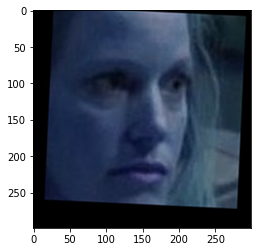

/content/PINS/pins_Anna Gunn/Anna Gunn99_2266.jpg


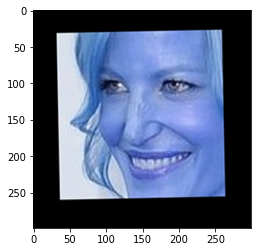

/content/PINS/pins_Anna Gunn/Anna Gunn5_2318.jpg


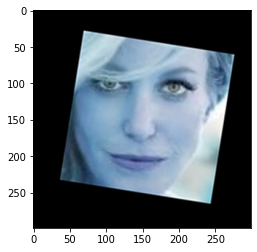

/content/PINS/pins_Anna Gunn/Anna Gunn36_2303.jpg


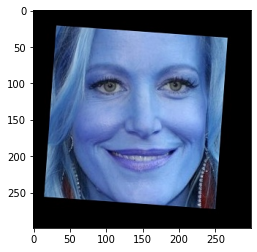

/content/PINS/pins_Anna Gunn/Anna Gunn199_2269.jpg


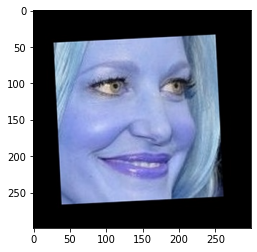

/content/PINS/pins_Anna Gunn/Anna Gunn156_2288.jpg


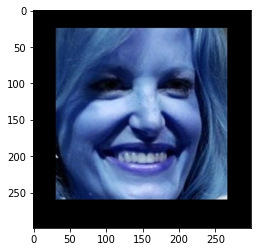

/content/PINS/pins_Anna Gunn/Anna Gunn163_2312.jpg


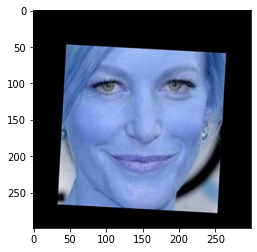

/content/PINS/pins_Anna Gunn/Anna Gunn93_2286.jpg


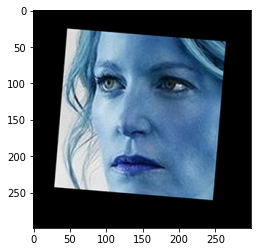

/content/PINS/pins_Anna Gunn/Anna Gunn125_2314.jpg


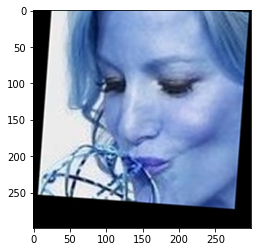

/content/PINS/pins_Anna Gunn/Anna Gunn24_2281.jpg


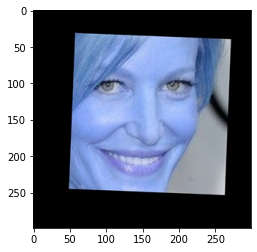

In [11]:
for i in range(10):
  print(str(metadata[i]))
  img=cv2.imread(str(metadata[i]))
  plt.imshow(img)
  plt.show()

Defining data generator for positive,negative and anchor images: 

In [44]:
def triplet_generator():
    ''' Dummy triplet generator for API usage demo only.
    Will be replaced by a version that uses real image data later.
    :return: a batch of (anchor, positive, negative) triplets
    '''
    while True:
        a_batch = np.random.rand(4, 96, 96, 3)
        p_batch = np.random.rand(4, 96, 96, 3)
        n_batch = np.random.rand(4, 96, 96, 3)
        yield [a_batch , p_batch, n_batch], None

In [16]:
str(metadata[0])

'/content/PINS/pins_elizabeth olsen face/elizabeth olsen face177.jpg'

In [17]:
img=cv2.imread(str(metadata[0]))

In [18]:
img.shape

(299, 299, 3)

In [26]:
!pip install dlib

In [ ]:
from 

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import AlignDlib
import dlib
%matplotlib inline

Defining the preprocessing class for preprocessing the images:

In [11]:
TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)


class AlignDlib:
    """
    Use `dlib's landmark estimation <http://blog.dlib.net/2014/08/real-time-face-pose-estimation.html>`_ to align faces.
    The alignment preprocess faces for input into a neural network.
    Faces are resized to the same size (such as 96x96) and transformed
    to make landmarks (such as the eyes and nose) appear at the same
    location on every image.
    Normalized landmarks:
    .. image:: ../images/dlib-landmark-mean.png
    """

    #: Landmark indices.
    INNER_EYES_AND_BOTTOM_LIP = [39, 42, 57]
    OUTER_EYES_AND_NOSE = [36, 45, 33]

    def __init__(self, facePredictor):
        """
        Instantiate an 'AlignDlib' object.
        :param facePredictor: The path to dlib's
        :type facePredictor: str
        """
        assert facePredictor is not None

        self.detector = dlib.get_frontal_face_detector()
        self.predictor = dlib.shape_predictor(facePredictor)

    def getAllFaceBoundingBoxes(self, rgbImg):
        """
        Find all face bounding boxes in an image.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :return: All face bounding boxes in an image.
        :rtype: dlib.rectangles
        """
        assert rgbImg is not None

        try:
            return self.detector(rgbImg, 1)
        except Exception as e:
            print("Warning: {}".format(e))
            # In rare cases, exceptions are thrown.
            return []

    def getLargestFaceBoundingBox(self, rgbImg, skipMulti=False):
        """
        Find the largest face bounding box in an image.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param skipMulti: Skip image if more than one face detected.
        :type skipMulti: bool
        :return: The largest face bounding box in an image, or None.
        :rtype: dlib.rectangle
        """
        assert rgbImg is not None

        faces = self.getAllFaceBoundingBoxes(rgbImg)
        if (not skipMulti and len(faces) > 0) or len(faces) == 1:
            return max(faces, key=lambda rect: rect.width() * rect.height())
        else:
            return None

    def findLandmarks(self, rgbImg, bb):
        """
        Find the landmarks of a face.
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param bb: Bounding box around the face to find landmarks for.
        :type bb: dlib.rectangle
        :return: Detected landmark locations.
        :rtype: list of (x,y) tuples
        """
        assert rgbImg is not None
        assert bb is not None

        points = self.predictor(rgbImg, bb)
        return list(map(lambda p: (p.x, p.y), points.parts()))

    def align(self, imgDim, rgbImg, bb=None,
              landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP,
              skipMulti=False):
        r"""align(imgDim, rgbImg, bb=None, landmarks=None, landmarkIndices=INNER_EYES_AND_BOTTOM_LIP)
        Transform and align a face in an image.
        :param imgDim: The edge length in pixels of the square the image is resized to.
        :type imgDim: int
        :param rgbImg: RGB image to process. Shape: (height, width, 3)
        :type rgbImg: numpy.ndarray
        :param bb: Bounding box around the face to align. \
                   Defaults to the largest face.
        :type bb: dlib.rectangle
        :param landmarks: Detected landmark locations. \
                          Landmarks found on `bb` if not provided.
        :type landmarks: list of (x,y) tuples
        :param landmarkIndices: The indices to transform to.
        :type landmarkIndices: list of ints
        :param skipMulti: Skip image if more than one face detected.
        :type skipMulti: bool
        :return: The aligned RGB image. Shape: (imgDim, imgDim, 3)
        :rtype: numpy.ndarray
        """
        assert imgDim is not None
        assert rgbImg is not None
        assert landmarkIndices is not None

        if bb is None:
            bb = self.getLargestFaceBoundingBox(rgbImg, skipMulti)
            if bb is None:
                return

        if landmarks is None:
            landmarks = self.findLandmarks(rgbImg, bb)

        npLandmarks = np.float32(landmarks)
        npLandmarkIndices = np.array(landmarkIndices)

        H = cv2.getAffineTransform(npLandmarks[npLandmarkIndices],
                                   imgDim * MINMAX_TEMPLATE[npLandmarkIndices])
        thumbnail = cv2.warpAffine(rgbImg, H, (imgDim, imgDim))

        return thumbnail

In [24]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"

--2021-06-26 12:31:39--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  25.9MB/s    in 2.4s    

2021-06-26 12:31:42 (25.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



ERROR: Could not find a version that satisfies the requirement bz2 (from versions: none)
ERROR: No matching distribution found for bz2


Aligning faces of the images in the dataset using AlignDib class:

In [12]:
import bz2
import os

from urllib.request import urlopen

def download_landmarks(dst_file):
    url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
    decompressor = bz2.BZ2Decompressor()
    
    with urlopen(url) as src, open(dst_file, 'wb') as dst:
        data = src.read(1024)
        while len(data) > 0:
            dst.write(decompressor.decompress(data))
            data = src.read(1024)

dst_dir = 'models'
dst_file = os.path.join(dst_dir, 'landmarks.dat')

if not os.path.exists(dst_file):
    os.makedirs(dst_dir)
    download_landmarks(dst_file)

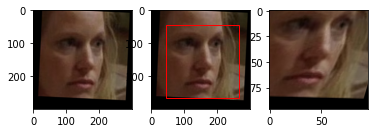

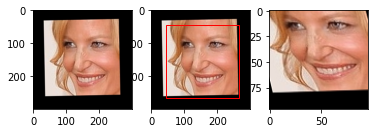

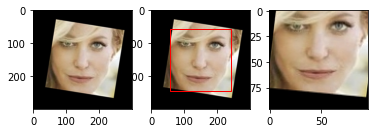

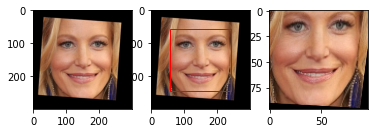

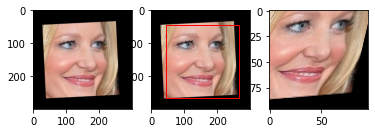

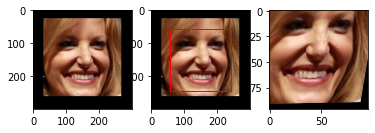

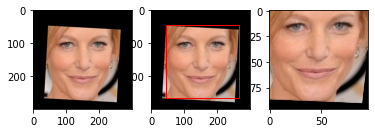

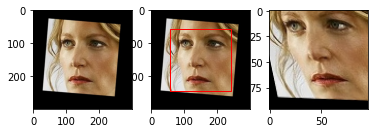

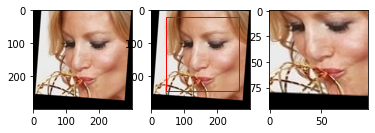

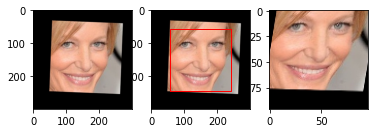

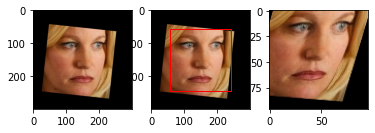

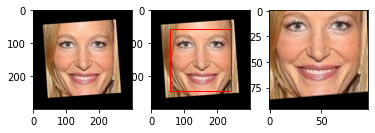

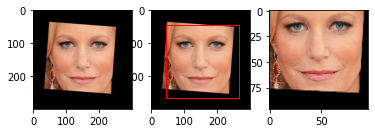

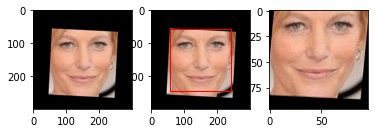

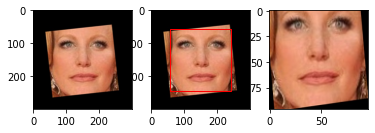

AttributeError: ignored

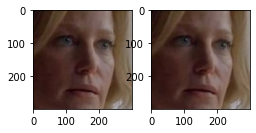

In [13]:
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('/content/models/landmarks.dat')

# Load an image of Jacques Chirac
for i in range(0,20):
  jc_orig = load_image(metadata[i].image_path())

# Detect face and return bounding box
  bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
  jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
  plt.subplot(131)
  plt.imshow(jc_orig)

# Show original image with bounding box
  plt.subplot(132)
  plt.imshow(jc_orig)
  plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
  plt.subplot(133)
  plt.imshow(jc_aligned)
  plt.show()

Using inception network architecture:

In [14]:
from keras.layers import Conv2D, ZeroPadding2D, Activation
from keras.layers.normalization import BatchNormalization

_FLOATX = 'float32'

def variable(value, dtype=_FLOATX, name=None):
  v = tf.Variable(np.asarray(value, dtype=dtype), name=name)
  _get_session().run(v.initializer)
  return v

def shape(x):
  return x.get_shape()

def square(x):
  return tf.square(x)

def zeros(shape, dtype=_FLOATX, name=None):
  return variable(np.zeros(shape), dtype, name)

def concatenate(tensors, axis=-1):
  if axis < 0:
      axis = axis % len(tensors[0].get_shape())
  return tf.concat(axis, tensors)

def LRN2D(x):
  return tf.nn.lrn(x, alpha=1e-4, beta=0.75)

def conv2d_bn(
  x,
  layer=None,
  cv1_out=None,
  cv1_filter=(1, 1),
  cv1_strides=(1, 1),
  cv2_out=None,
  cv2_filter=(3, 3),
  cv2_strides=(1, 1),
  padding=None,
):
  num = '' if cv2_out == None else '1'
  tensor = Conv2D(cv1_out, cv1_filter, strides=cv1_strides, name=layer+'_conv'+num)(x)
  tensor = BatchNormalization(axis=3, epsilon=0.00001, name=layer+'_bn'+num)(tensor)
  tensor = Activation('relu')(tensor)
  if padding == None:
    return tensor
  tensor = ZeroPadding2D(padding=padding)(tensor)
  if cv2_out == None:
    return tensor
  tensor = Conv2D(cv2_out, cv2_filter, strides=cv2_strides, name=layer+'_conv'+'2')(tensor)
  tensor = BatchNormalization(axis=3, epsilon=0.00001, name=layer+'_bn'+'2')(tensor)
  tensor = Activation('relu')(tensor)
  return tensor

weights = [
  'conv1', 'bn1', 'conv2', 'bn2', 'conv3', 'bn3',
  'inception_3a_1x1_conv', 'inception_3a_1x1_bn',
  'inception_3a_pool_conv', 'inception_3a_pool_bn',
  'inception_3a_5x5_conv1', 'inception_3a_5x5_conv2', 'inception_3a_5x5_bn1', 'inception_3a_5x5_bn2',
  'inception_3a_3x3_conv1', 'inception_3a_3x3_conv2', 'inception_3a_3x3_bn1', 'inception_3a_3x3_bn2',
  'inception_3b_3x3_conv1', 'inception_3b_3x3_conv2', 'inception_3b_3x3_bn1', 'inception_3b_3x3_bn2',
  'inception_3b_5x5_conv1', 'inception_3b_5x5_conv2', 'inception_3b_5x5_bn1', 'inception_3b_5x5_bn2',
  'inception_3b_pool_conv', 'inception_3b_pool_bn',
  'inception_3b_1x1_conv', 'inception_3b_1x1_bn',
  'inception_3c_3x3_conv1', 'inception_3c_3x3_conv2', 'inception_3c_3x3_bn1', 'inception_3c_3x3_bn2',
  'inception_3c_5x5_conv1', 'inception_3c_5x5_conv2', 'inception_3c_5x5_bn1', 'inception_3c_5x5_bn2',
  'inception_4a_3x3_conv1', 'inception_4a_3x3_conv2', 'inception_4a_3x3_bn1', 'inception_4a_3x3_bn2',
  'inception_4a_5x5_conv1', 'inception_4a_5x5_conv2', 'inception_4a_5x5_bn1', 'inception_4a_5x5_bn2',
  'inception_4a_pool_conv', 'inception_4a_pool_bn',
  'inception_4a_1x1_conv', 'inception_4a_1x1_bn',
  'inception_4e_3x3_conv1', 'inception_4e_3x3_conv2', 'inception_4e_3x3_bn1', 'inception_4e_3x3_bn2',
  'inception_4e_5x5_conv1', 'inception_4e_5x5_conv2', 'inception_4e_5x5_bn1', 'inception_4e_5x5_bn2',
  'inception_5a_3x3_conv1', 'inception_5a_3x3_conv2', 'inception_5a_3x3_bn1', 'inception_5a_3x3_bn2',
  'inception_5a_pool_conv', 'inception_5a_pool_bn',
  'inception_5a_1x1_conv', 'inception_5a_1x1_bn',
  'inception_5b_3x3_conv1', 'inception_5b_3x3_conv2', 'inception_5b_3x3_bn1', 'inception_5b_3x3_bn2',
  'inception_5b_pool_conv', 'inception_5b_pool_bn',
  'inception_5b_1x1_conv', 'inception_5b_1x1_bn',
  'dense_layer'
]

conv_shape = {
  'conv1': [64, 3, 7, 7],
  'conv2': [64, 64, 1, 1],
  'conv3': [192, 64, 3, 3],
  'inception_3a_1x1_conv': [64, 192, 1, 1],
  'inception_3a_pool_conv': [32, 192, 1, 1],
  'inception_3a_5x5_conv1': [16, 192, 1, 1],
  'inception_3a_5x5_conv2': [32, 16, 5, 5],
  'inception_3a_3x3_conv1': [96, 192, 1, 1],
  'inception_3a_3x3_conv2': [128, 96, 3, 3],
  'inception_3b_3x3_conv1': [96, 256, 1, 1],
  'inception_3b_3x3_conv2': [128, 96, 3, 3],
  'inception_3b_5x5_conv1': [32, 256, 1, 1],
  'inception_3b_5x5_conv2': [64, 32, 5, 5],
  'inception_3b_pool_conv': [64, 256, 1, 1],
  'inception_3b_1x1_conv': [64, 256, 1, 1],
  'inception_3c_3x3_conv1': [128, 320, 1, 1],
  'inception_3c_3x3_conv2': [256, 128, 3, 3],
  'inception_3c_5x5_conv1': [32, 320, 1, 1],
  'inception_3c_5x5_conv2': [64, 32, 5, 5],
  'inception_4a_3x3_conv1': [96, 640, 1, 1],
  'inception_4a_3x3_conv2': [192, 96, 3, 3],
  'inception_4a_5x5_conv1': [32, 640, 1, 1,],
  'inception_4a_5x5_conv2': [64, 32, 5, 5],
  'inception_4a_pool_conv': [128, 640, 1, 1],
  'inception_4a_1x1_conv': [256, 640, 1, 1],
  'inception_4e_3x3_conv1': [160, 640, 1, 1],
  'inception_4e_3x3_conv2': [256, 160, 3, 3],
  'inception_4e_5x5_conv1': [64, 640, 1, 1],
  'inception_4e_5x5_conv2': [128, 64, 5, 5],
  'inception_5a_3x3_conv1': [96, 1024, 1, 1],
  'inception_5a_3x3_conv2': [384, 96, 3, 3],
  'inception_5a_pool_conv': [96, 1024, 1, 1],
  'inception_5a_1x1_conv': [256, 1024, 1, 1],
  'inception_5b_3x3_conv1': [96, 736, 1, 1],
  'inception_5b_3x3_conv2': [384, 96, 3, 3],
  'inception_5b_pool_conv': [96, 736, 1, 1],
  'inception_5b_1x1_conv': [256, 736, 1, 1],
}

def load_weights():
  weightsDir = './weights'
  fileNames = filter(lambda f: not f.startswith('.'), os.listdir(weightsDir))
  paths = {}
  weights_dict = {}

  for n in fileNames:
    paths[n.replace('.csv', '')] = weightsDir + '/' + n

  for name in weights:
    if 'conv' in name:
      conv_w = genfromtxt(paths[name + '_w'], delimiter=',', dtype=None)
      conv_w = np.reshape(conv_w, conv_shape[name])
      conv_w = np.transpose(conv_w, (2, 3, 1, 0))
      conv_b = genfromtxt(paths[name + '_b'], delimiter=',', dtype=None)
      weights_dict[name] = [conv_w, conv_b]     
    elif 'bn' in name:
      bn_w = genfromtxt(paths[name + '_w'], delimiter=',', dtype=None)
      bn_b = genfromtxt(paths[name + '_b'], delimiter=',', dtype=None)
      bn_m = genfromtxt(paths[name + '_m'], delimiter=',', dtype=None)
      bn_v = genfromtxt(paths[name + '_v'], delimiter=',', dtype=None)
      weights_dict[name] = [bn_w, bn_b, bn_m, bn_v]
    elif 'dense' in name:
      dense_w = genfromtxt(weightsDir+'/dense_w.csv', delimiter=',', dtype=None)
      dense_w = np.reshape(dense_w, (128, 736))
      dense_w = np.transpose(dense_w, (1, 0))
      dense_b = genfromtxt(weightsDir+'/dense_b.csv', delimiter=',', dtype=None)
      weights_dict[name] = [dense_w, dense_b]

  return weights_dict

In [15]:
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras import backend as K

#import utils
#from utils import LRN2D

def create_model():
    myInput = Input(shape=(96, 96, 3))

    x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)
    x = Lambda(LRN2D, name='lrn_1')(x)
    x = Conv2D(64, (1, 1), name='conv2')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Conv2D(192, (3, 3), name='conv3')(x)
    x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
    x = Activation('relu')(x)
    x = Lambda(LRN2D, name='lrn_2')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D(pool_size=3, strides=2)(x)

    # Inception3a
    inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
    inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
    inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
    inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
    inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

    inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
    inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
    inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
    inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
    inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

    inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
    inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
    inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
    inception_3a_pool = Activation('relu')(inception_3a_pool)
    inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

    inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
    inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
    inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

    inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

    # Inception3b
    inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
    inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
    inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
    inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
    inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

    inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
    inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
    inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
    inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
    inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

    inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3a)
    inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
    inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
    inception_3b_pool = Activation('relu')(inception_3b_pool)
    inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

    inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
    inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
    inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

    inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

    # Inception3c
    inception_3c_3x3 = conv2d_bn(inception_3b,
                                       layer='inception_3c_3x3',
                                       cv1_out=128,
                                       cv1_filter=(1, 1),
                                       cv2_out=256,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(2, 2),
                                       padding=(1, 1))

    inception_3c_5x5 = conv2d_bn(inception_3b,
                                       layer='inception_3c_5x5',
                                       cv1_out=32,
                                       cv1_filter=(1, 1),
                                       cv2_out=64,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(2, 2),
                                       padding=(2, 2))

    inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
    inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

    inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

    #inception 4a
    inception_4a_3x3 = conv2d_bn(inception_3c,
                                       layer='inception_4a_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=192,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))
    inception_4a_5x5 = conv2d_bn(inception_3c,
                                       layer='inception_4a_5x5',
                                       cv1_out=32,
                                       cv1_filter=(1, 1),
                                       cv2_out=64,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(1, 1),
                                       padding=(2, 2))

    inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3c)
    inception_4a_pool = conv2d_bn(inception_4a_pool,
                                        layer='inception_4a_pool',
                                        cv1_out=128,
                                        cv1_filter=(1, 1),
                                        padding=(2, 2))
    inception_4a_1x1 = conv2d_bn(inception_3c,
                                       layer='inception_4a_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))
    inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

    #inception4e
    inception_4e_3x3 = conv2d_bn(inception_4a,
                                       layer='inception_4e_3x3',
                                       cv1_out=160,
                                       cv1_filter=(1, 1),
                                       cv2_out=256,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(2, 2),
                                       padding=(1, 1))
    inception_4e_5x5 = conv2d_bn(inception_4a,
                                       layer='inception_4e_5x5',
                                       cv1_out=64,
                                       cv1_filter=(1, 1),
                                       cv2_out=128,
                                       cv2_filter=(5, 5),
                                       cv2_strides=(2, 2),
                                       padding=(2, 2))
    inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
    inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

    inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

    #inception5a
    inception_5a_3x3 = conv2d_bn(inception_4e,
                                       layer='inception_5a_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=384,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))

    inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4e)
    inception_5a_pool = conv2d_bn(inception_5a_pool,
                                        layer='inception_5a_pool',
                                        cv1_out=96,
                                        cv1_filter=(1, 1),
                                        padding=(1, 1))
    inception_5a_1x1 = conv2d_bn(inception_4e,
                                       layer='inception_5a_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))

    inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

    #inception_5b
    inception_5b_3x3 = conv2d_bn(inception_5a,
                                       layer='inception_5b_3x3',
                                       cv1_out=96,
                                       cv1_filter=(1, 1),
                                       cv2_out=384,
                                       cv2_filter=(3, 3),
                                       cv2_strides=(1, 1),
                                       padding=(1, 1))
    inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)
    inception_5b_pool = conv2d_bn(inception_5b_pool,
                                        layer='inception_5b_pool',
                                        cv1_out=96,
                                        cv1_filter=(1, 1))
    inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

    inception_5b_1x1 = conv2d_bn(inception_5a,
                                       layer='inception_5b_1x1',
                                       cv1_out=256,
                                       cv1_filter=(1, 1))
    inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

    av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
    reshape_layer = Flatten()(av_pool)
    dense_layer = Dense(128, name='dense_layer')(reshape_layer)
    #norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

    return Model(inputs=[myInput], outputs=dense_layer)

Creating the backbone of the siamese network to get the embedding vectors and using these vectors for the siamese network to be trained:

In [33]:
#from model import create_model

nn4_small2 = create_model()

Defining the siamese network input and triplet loss for the positive,anchor and negative images:

In [54]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3))
in_p = Input(shape=(96, 96, 3))
in_n = Input(shape=(96, 96, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2_pretrained(in_a)
emb_p = nn4_small2_pretrained(in_p)
emb_n = nn4_small2_pretrained(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

Training the network from scratch using the data generator defined above:

In [55]:
generator = triplet_generator() 

nn4_small2_train.compile(loss=None, optimizer='adam')
nn4_small2_train.fit_generator(generator, epochs=50, steps_per_epoch=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 26s 48ms/step - loss: 1.2168
Epoch 2/50
50/50 [==============================] - 2s 50ms/step - loss: 0.8478
Epoch 3/50
50/50 [==============================] - 2s 50ms/step - loss: 0.8596
Epoch 4/50
50/50 [==============================] - 2s 49ms/step - loss: 0.8281
Epoch 5/50
50/50 [==============================] - 2s 48ms/step - loss: 0.8065
Epoch 6/50
50/50 [==============================] - 2s 49ms/step - loss: 0.7993
Epoch 7/50
50/50 [==============================] - 2s 49ms/step - loss: 0.7985
Epoch 8/50
50/50 [==============================] - 2s 48ms/step - loss: 0.7902
Epoch 9/50
50/50 [==============================] - 2s 50ms/step - loss: 0.8158
Epoch 10/50
50/50 [==============================] - 2s 50ms/step - loss: 0.7939
Epoch 11/50
50/50 [==============================] - 2s 48ms/step - loss: 0.7918
Epoch 12/50
50/50 [==============================] - 2s 49ms/step - loss: 0.7977
Epoch 13/50
50/50 [=================

The loss remains around 0.8 as seen above.

In [18]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

Storing all the embedding vectors in a list:

In [23]:
embedded_nn1 = []
img_paths=[]
for i, m in enumerate(metadata):
    print(i)
    #img=preprocess_image1(m.image_path())
    img = load_image(m.image_path())
    #img=cv2.resize(img,(96,96))
    img = align_image(img)
    # scale RGB values to interval [0,1]
    if img is not None:
      img = (img / 255).astype('float32')
    # obtain embedding vector for image
      embedded_nn1.append(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0])
      img_paths.append(m.image_path())
    #embedded_nn.append(nn4_small2_pretrained.predict((img)))

Streaming output truncated to the last 5000 lines.
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959

In [128]:
embedded_nn1[0]

array([ 0.15168557,  0.04148319, -0.06835232, -0.6100832 , -0.11696077,
        0.27454185, -0.05400287,  0.5684958 , -0.10381238, -0.46559647,
       -0.5148087 , -0.06959281,  0.54366994, -0.115018  ,  0.0966168 ,
       -0.48728114, -0.17746171, -1.0088701 , -0.55701506,  0.47296357,
        0.10672215, -0.15833963,  0.02639547,  0.32980835, -0.10128011,
       -0.03486632, -0.1188179 , -0.21564165, -0.3384525 , -0.14775439,
        0.44143048, -0.4312876 , -0.26900792,  0.4041157 , -0.37402207,
       -0.06195631, -0.1778099 ,  0.7897121 , -0.41307017,  0.07271487,
       -0.06959137, -0.12814368, -0.14810942,  0.32793033,  0.29161078,
       -0.08165936,  0.0398608 ,  0.26945215, -0.09295036,  0.6815405 ,
       -0.17401281, -0.42508382,  0.19826709, -0.02273189,  0.3763626 ,
       -0.2661458 , -0.65494406,  0.6811369 ,  0.25572327, -1.0864587 ,
       -0.160677  ,  0.17884414,  0.10401744,  0.01363903, -0.4971575 ,
       -0.166936  ,  0.38697672,  0.49365142, -0.15321492, -0.74

In [ ]:
--id 1GydDNDWm7WkLLmCbPPllsBl4zkeBfAZr&export=download

In [50]:
import h5py

In [16]:
!gdown --id 1AupxyVc2sl8c6nugz7NLWYfk8J-AI2F9&export=download

Downloading...
From: https://drive.google.com/uc?id=1AupxyVc2sl8c6nugz7NLWYfk8J-AI2F9
To: /content/nn4.small2.v1.h5
15.3MB [00:00, 48.7MB/s]


Using pretrained weights for the above model:

In [17]:
nn4_small2_pretrained = create_model()
nn4_small2_pretrained.load_weights('/content/nn4.small2.v1.h5')

Saving all embedding vectors using the pretraind model predictions in one list:

In [ ]:
embedded_nn1 = []
img_paths=[]
for i, m in enumerate(metadata):
    print(i)
    #img=preprocess_image1(m.image_path())
    img = load_image(m.image_path())
    #img=cv2.resize(img,(96,96))
    img = align_image(img)
    # scale RGB values to interval [0,1]
    if img is not None:
      img = (img / 255).astype('float32')
    # obtain embedding vector for image
      embedded_nn1.append(nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0])
      img_paths.append(m.image_path())
    #embedded_nn.append(nn4_small2_pretrained.predict((img)))

Streaming output truncated to the last 5000 lines.
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959

In [36]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Layer

# Input for anchor, positive and negative images
in_a = Input(shape=(96, 96, 3))
in_p = Input(shape=(96, 96, 3))
in_n = Input(shape=(96, 96, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = nn4_small2(in_a)
emb_p = nn4_small2(in_p)
emb_n = nn4_small2(in_n)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
nn4_small2_train = Model([in_a, in_p, in_n], triplet_loss_layer)

In [39]:
import tensorflow as tf

In [130]:
import tensorflow as tf

In [85]:
from keras.layers import Convolution2D
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras import backend as K


Defining the VGG architecture:

In [87]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Loading the pretrained weights in the model:

In [88]:
model.load_weights('/content/Part 3 - vgg_face_weights.h5')

In [89]:
model.pop()
model.add(Dense(128, use_bias=False))

for layer in model.layers[:-2]:
    layer.trainable = False

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [72]:
def loss_function(x, alpha = 0.2):
    # Triplet Loss function.
    anchor,positive,negative = x
    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)
    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)
    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.mean(K.maximum(basic_loss,0.0))
    return loss

Combining the model input and output of the 2nd last layer that gives the embedding vector:

In [262]:
	
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-2].output)

In [92]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

Defining the function for preprocessing the images:

In [93]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [83]:
img1_representation = vgg_face_descriptor.predict(preprocess_image(str(metadata[0])))[0,:]
img2_representation = vgg_face_descriptor.predict(preprocess_image(str(metadata[1])))[0,:]

Defining the cosine similarity and euclidian distance functions for measuring the distance between 2 images and thus inferring how similar the persons in the image are:

In [265]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

Generating the distances between sample images and verfying if the persons in the images are same or not using epsilon as the threshold value given below:

In [375]:
epsilon = 0.40

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image((img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image((img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(K.l2_normalize(img1_representation), K.l2_normalize(img2_representation))
    
    print("Cosine similarity: ",cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img((img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img((img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

Cosine similarity:  0.385093629360199
Euclidean distance:  0.8776032
verified... they are same person


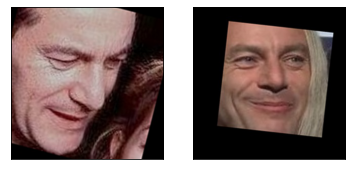

-----------------------------------------


In [376]:
verifyFace(str(metadata[3004]), str(metadata[3003]))

As seen above, the cosine similarity is 0.36 which is less than the threshold indicating they are the same person. The euclidian distance is 0.87

Defining the siamese network using the embedding vectors obained from the pretrained VGG model:

In [27]:
from keras.layers import Input, Layer

In [28]:
in_a = Input(shape=(224, 224, 3))
in_p = Input(shape=(224, 224, 3))
in_n = Input(shape=(224, 224, 3))

# Output for anchor, positive and negative embedding vectors
# The nn4_small model instance is shared (Siamese network)
emb_a = model(in_a)
emb_a=K.l2_normalize(emb_a, axis=1)

emb_p = model(in_p)
emb_p=K.l2_normalize(emb_p, axis=1)

emb_n = model(in_n)
emb_n=K.l2_normalize(emb_n, axis=1)

class TripletLossLayer(Layer):
    def __init__(self, alpha, **kwargs):
        self.alpha = alpha
        super(TripletLossLayer, self).__init__(**kwargs)
    
    def triplet_loss(self, inputs):
        a, p, n = inputs
        p_dist = K.sum(K.square(a-p), axis=-1)
        n_dist = K.sum(K.square(a-n), axis=-1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha, 0), axis=0)
    
    def call(self, inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])

# Model that can be trained with anchor, positive negative images
siamese_nw = Model([in_a, in_p, in_n], triplet_loss_layer)

In [ ]:
Generating the positive,anchor and negative images using the below data generator class:

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataset_path, batch_size=32, shuffle=True):
        self.dataset = self.curate_dataset(dataset_path)
        self.dataset_path = dataset_path
        self.shuffle = shuffle
        self.batch_size =batch_size
        self.no_of_people = len(list(self.dataset.keys()))
        self.on_epoch_end()
        
    def __getitem__(self, index):
        people = list(self.dataset.keys())[index * self.batch_size: (index + 1) * self.batch_size]
        P = []
        A = []
        N = []
        
        for person in people:
            anchor_index = random.randint(0, len(self.dataset[person])-1)
            a = self.get_image(person, anchor_index)
            
            positive_index = random.randint(0, len(self.dataset[person])-1)
            while positive_index == anchor_index:
                positive_index = random.randint(0, len(self.dataset[person])-1)
            p = self.get_image(person, positive_index)
            
            negative_person_index = random.randint(0, self.no_of_people - 1)
            negative_person = list(self.dataset.keys())[negative_person_index]
            while negative_person == person:
                negative_person_index = random.randint(0, self.no_of_people - 1)
                negative_person = list(self.dataset.keys())[negative_person_index]
            
            negative_index = random.randint(0, len(self.dataset[negative_person])-1)
            n = self.get_image(negative_person, negative_index)
            P.append(p)
            A.append(a)
            N.append(n)
        A = np.asarray(A)
        N = np.asarray(N)
        P = np.asarray(P)
        return [A, P, N]
        
    def __len__(self):
        return self.no_of_people // self.batch_size
        
    def curate_dataset(self, dataset_path):
        dataset = {} 
        for f in os.listdir('/content/pins/PINS'):
            
            image_list = os.listdir('/content/pins/PINS/'+f)
            print(image_list)
            for image in image_list:
                print(image)
                folder_name, file_name = f,image
                if folder_name in dataset.keys():
                    dataset[folder_name].append(file_name)
                else:
                    dataset[folder_name] = [file_name]
        return dataset
    
    def on_epoch_end(self):
        if self.shuffle:
            keys = list(self.dataset.keys())
            random.shuffle(keys)
            dataset_ =  {}
            for key in keys:
                dataset_[key] = self.dataset[key]
            self.dataset = dataset_
            
    def get_image(self, person, index):
        # print(os.path.join(self.dataset_path, os.path.join('images/' + person, self.dataset[person][index])))
        img = cv2.imread(os.path.join(self.dataset_path, os.path.join(person, self.dataset[person][index])))
        img = cv2.resize(img, (224, 224))
        img = np.asarray(img, dtype=np.float64)
        img = preprocess_input1(img)
        return img
    
data_generator = DataGenerator(dataset_path='/content/pins/PINS/')

Streaming output truncated to the last 5000 lines.
Ryan Reynolds68.jpg
Ryan Reynolds31.jpg
Ryan Reynolds17.jpg
Ryan Reynolds88.jpg
Ryan Reynolds47.jpg
Ryan Reynolds14.jpg
Ryan Reynolds21.jpg
Ryan Reynolds70.jpg
Ryan Reynolds85.jpg
Ryan Reynolds91.jpg
Ryan Reynolds13.jpg
Ryan Reynolds45.jpg
Ryan Reynolds28.jpg
Ryan Reynolds67.jpg
Ryan Reynolds23.jpg
Ryan Reynolds94.jpg
Ryan Reynolds34.jpg
Ryan Reynolds48.jpg
Ryan Reynolds51.jpg
Ryan Reynolds69.jpg
Ryan Reynolds15.jpg
Ryan Reynolds18.jpg
Ryan Reynolds66.jpg
Ryan Reynolds40.jpg
Ryan Reynolds24.jpg
Ryan Reynolds26.jpg
Ryan Reynolds73.jpg
Ryan Reynolds43.jpg
Ryan Reynolds96.jpg
Ryan Reynolds72.jpg
Ryan Reynolds39.jpg
Ryan Reynolds32.jpg
Ryan Reynolds35.jpg
Ryan Reynolds59.jpg
Ryan Reynolds42.jpg
Ryan Reynolds12.jpg
Ryan Reynolds33.jpg
Ryan Reynolds52.jpg
Ryan Reynolds22.jpg
Ryan Reynolds74.jpg
Ryan Reynolds27.jpg
Ryan Reynolds86.jpg
Ryan Reynolds0.jpg
Ryan Reynolds36.jpg
Ryan Reynolds95.jpg
Ryan Reynolds56.jpg
Ryan Reynolds79.jpg
Ryan Reyno

Compiling the network using Adam optimizer:

In [37]:
siamese_nw.compile(loss=None, optimizer='adam')
for i in range(0,3):
  siamese_nw.fit(data_generator[i], epochs=10, steps_per_epoch=5)

Epoch 1/10
5/5 [==============================] - 15s 445ms/step - loss: 0.2085
Epoch 2/10
5/5 [==============================] - 1s 141ms/step - loss: 0.0658
Epoch 3/10
5/5 [==============================] - 1s 142ms/step - loss: 0.1343
Epoch 4/10
5/5 [==============================] - 1s 139ms/step - loss: 0.0051
Epoch 5/10
5/5 [==============================] - 1s 140ms/step - loss: 0.0307
Epoch 6/10
5/5 [==============================] - 1s 140ms/step - loss: 0.0211
Epoch 7/10
5/5 [==============================] - 1s 141ms/step - loss: 0.0000e+00
Epoch 8/10
5/5 [==============================] - 1s 137ms/step - loss: 0.0000e+00
Epoch 9/10
5/5 [==============================] - 1s 139ms/step - loss: 0.0000e+00
Epoch 10/10
5/5 [==============================] - 1s 138ms/step - loss: 0.0000e+00
Epoch 1/10
5/5 [==============================] - 1s 139ms/step - loss: 0.1688
Epoch 2/10
5/5 [==============================] - 1s 137ms/step - loss: 0.0298
Epoch 3/10
5/5 [==================

As seen below the loss remains around 0 which is better than that trained using Inception network above.

In [42]:
img1=data_generator[0][0][10].reshape(1,224,224,3)
img2=data_generator[0][1][10].reshape(1,224,224,3)
img3=data_generator[0][2][10].reshape(1,224,224,3)

In [43]:
emb_a = model(img1)
emb_a=K.l2_normalize(emb_a, axis=1)

emb_p = model(img2)
emb_p=K.l2_normalize(emb_p, axis=1)

emb_n = model(img3)
emb_n=K.l2_normalize(emb_n, axis=1)

In [44]:
a, p, n = [emb_a,emb_p,emb_n]
p_dist = K.sum(K.square(a-p), axis=-1)
n_dist = K.sum(K.square(a-n), axis=-1)

In [45]:
print(p_dist)
print(n_dist)

tf.Tensor([0.3278778], shape=(1,), dtype=float32)
tf.Tensor([1.8645527], shape=(1,), dtype=float32)


In [90]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [ ]:
K = tf.keras.backend
def preprocess_input1(x, data_format=None, version=1):
    x_temp = np.copy(x)
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if version == 1:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 93.5940
            x_temp[:, 1, :, :] -= 104.7624
            x_temp[:, 2, :, :] -= 129.1863
        else:
            x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 93.5940
            x_temp[..., 1] -= 104.7624
            x_temp[..., 2] -= 129.1863

    elif version == 2:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 91.4953
            x_temp[:, 1, :, :] -= 103.8827
            x_temp[:, 2, :, :] -= 131.0912
        else:
            x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 91.4953
            x_temp[..., 1] -= 103.8827
            x_temp[..., 2] -= 131.0912
    else:
        raise NotImplementedError

    return x_temp

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataset_path, batch_size=32, shuffle=True):
        self.dataset = self.curate_dataset(dataset_path)
        self.dataset_path = dataset_path
        self.shuffle = shuffle
        self.batch_size =batch_size
        self.no_of_people = len(list(self.dataset.keys()))
        self.on_epoch_end()
        
    def __getitem__(self, index):
        people = list(self.dataset.keys())[index * self.batch_size: (index + 1) * self.batch_size]
        P = []
        A = []
        N = []
        
        for person in people:
            anchor_index = random.randint(0, len(self.dataset[person])-1)
            a = self.get_image(person, anchor_index)
            
            positive_index = random.randint(0, len(self.dataset[person])-1)
            while positive_index == anchor_index:
                positive_index = random.randint(0, len(self.dataset[person])-1)
            p = self.get_image(person, positive_index)
            
            negative_person_index = random.randint(0, self.no_of_people - 1)
            negative_person = list(self.dataset.keys())[negative_person_index]
            while negative_person == person:
                negative_person_index = random.randint(0, self.no_of_people - 1)
                negative_person = list(self.dataset.keys())[negative_person_index]
            
            negative_index = random.randint(0, len(self.dataset[negative_person])-1)
            n = self.get_image(negative_person, negative_index)
            P.append(p)
            A.append(a)
            N.append(n)
        A = np.asarray(A)
        N = np.asarray(N)
        P = np.asarray(P)
        return [A, P, N]
        
    def __len__(self):
        return self.no_of_people // self.batch_size
        
    def curate_dataset(self, dataset_path):
        dataset = {} 
        for f in os.listdir('/content/pins/PINS'):
            
            image_list = os.listdir('/content/pins/PINS/'+f)
            print(image_list)
            for image in image_list:
                print(image)
                folder_name, file_name = f,image
                if folder_name in dataset.keys():
                    dataset[folder_name].append(file_name)
                else:
                    dataset[folder_name] = [file_name]
        return dataset
    
    def on_epoch_end(self):
        if self.shuffle:
            keys = list(self.dataset.keys())
            random.shuffle(keys)
            dataset_ =  {}
            for key in keys:
                dataset_[key] = self.dataset[key]
            self.dataset = dataset_
            
    def get_image(self, person, index):
        # print(os.path.join(self.dataset_path, os.path.join('images/' + person, self.dataset[person][index])))
        img = cv2.imread(os.path.join(self.dataset_path, os.path.join(person, self.dataset[person][index])))
        img = cv2.resize(img, (224, 224))
        img = np.asarray(img, dtype=np.float64)
        img = preprocess_input1(img)
        return img
    
data_generator = DataGenerator(dataset_path='/content/pins/PINS/')

Streaming output truncated to the last 5000 lines.
Ryan Reynolds68.jpg
Ryan Reynolds31.jpg
Ryan Reynolds17.jpg
Ryan Reynolds88.jpg
Ryan Reynolds47.jpg
Ryan Reynolds14.jpg
Ryan Reynolds21.jpg
Ryan Reynolds70.jpg
Ryan Reynolds85.jpg
Ryan Reynolds91.jpg
Ryan Reynolds13.jpg
Ryan Reynolds45.jpg
Ryan Reynolds28.jpg
Ryan Reynolds67.jpg
Ryan Reynolds23.jpg
Ryan Reynolds94.jpg
Ryan Reynolds34.jpg
Ryan Reynolds48.jpg
Ryan Reynolds51.jpg
Ryan Reynolds69.jpg
Ryan Reynolds15.jpg
Ryan Reynolds18.jpg
Ryan Reynolds66.jpg
Ryan Reynolds40.jpg
Ryan Reynolds24.jpg
Ryan Reynolds26.jpg
Ryan Reynolds73.jpg
Ryan Reynolds43.jpg
Ryan Reynolds96.jpg
Ryan Reynolds72.jpg
Ryan Reynolds39.jpg
Ryan Reynolds32.jpg
Ryan Reynolds35.jpg
Ryan Reynolds59.jpg
Ryan Reynolds42.jpg
Ryan Reynolds12.jpg
Ryan Reynolds33.jpg
Ryan Reynolds52.jpg
Ryan Reynolds22.jpg
Ryan Reynolds74.jpg
Ryan Reynolds27.jpg
Ryan Reynolds86.jpg
Ryan Reynolds0.jpg
Ryan Reynolds36.jpg
Ryan Reynolds95.jpg
Ryan Reynolds56.jpg
Ryan Reynolds79.jpg
Ryan Reyno

Generating embedded vectors using preprocess_input1 function for preprocessing input images:

In [13]:
embedded = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    print(i)
    img = cv2.imread(m.image_path())
    img = cv2.resize(img, (224, 224))
    img = np.asarray(img, dtype=np.float64)
    img = preprocess_input1(img)
    embedded[i] = model.predict(np.expand_dims(img, axis=0))[0]

Streaming output truncated to the last 5000 lines.
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959

In [276]:
embedded2 = embedded.copy()

Generating embedding vectors using preprocess_image as the function for preprocessing input images for generating embedding vectors:

In [94]:
embedded2 = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    print(i)
    img=preprocess_image(m.image_path())
    embedded2[i] = model.predict(img)

Streaming output truncated to the last 5000 lines.
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959

In [15]:
embedded2 = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    print(i)
    img=preprocess_image(m.image_path())
    embedded2[i] = model.predict(img)
    

Streaming output truncated to the last 5000 lines.
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959

Defining the euclidian distance function for generating distances for image pairs:

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(K.l2_normalize(emb1) - K.l2_normalize(emb2)))

<bound method IdentityMetadata.image_path of /content/PINS/pins_alycia debnam carey face/alycia debnam carey face97.jpg>


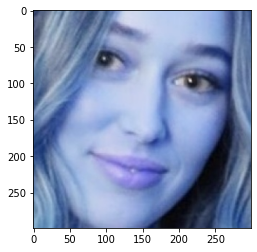

In [16]:
for i,m in enumerate(metadata):
  print(m.image_path)
  img = cv2.imread(m.image_path())
  plt.imshow(img)
  img = cv2.resize(img, (224, 224))
  img = np.asarray(img, dtype=np.float64)
  img = preprocess_input1(img)
  embedded1 = model.predict(np.expand_dims(img, axis=0))[0]
  break

Generating distance for sample images using the above embedding vectors:

/content/PINS/pins_Morena Baccarin/Morena Baccarin100.jpg
/content/PINS/pins_Morena Baccarin/Morena Baccarin31.jpg
/content/PINS/pins_Anna Gunn/Anna Gunn99_2266.jpg
/content/PINS/pins_Josh Radnor/Josh Radnor96.jpg


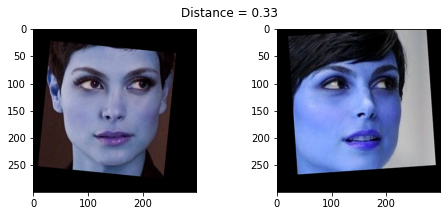

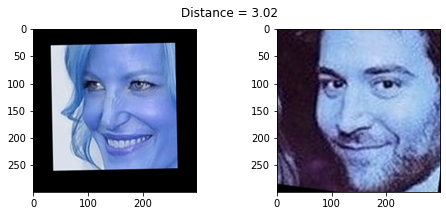

In [30]:
def show_pair(idx1, idx2):
    print(str(img_paths[idx1]))
    print(str(img_paths[idx2]))
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded_nn1[idx1], embedded_nn1[idx2]):.2f}')
    plt.subplot(121)
    
    img=cv2.imread(str(img_paths[idx1]))
    img1=cv2.imread(str(img_paths[idx2]))
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(img1)  

show_pair(505,510)
show_pair(1, 150)

/content/PINS/pins_jason isaacs/jason isaacs57_2052.jpg
/content/PINS/pins_jason isaacs/jason isaacs39_2110.jpg
/content/PINS/pins_Emma Stone/Emma Stone65.jpg
/content/PINS/pins_jason isaacs/jason isaacs125_2038.jpg


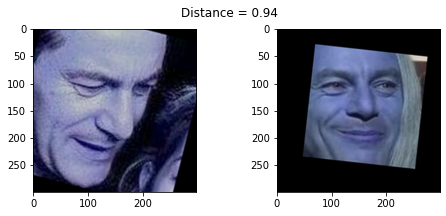

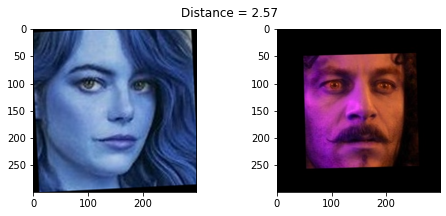

In [377]:
def show_pair(idx1, idx2):
    print(str(metadata[idx1]))
    print(str(metadata[idx2]))
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embedded2[idx1], embedded2[idx2]):.2f}')
    plt.subplot(121)
    
    img=cv2.imread(str(metadata[idx1]))
    img1=cv2.imread(str(metadata[idx2]))
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(img1)  

show_pair(3004,3003)
show_pair(2001, 3000)

In [17]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix


Saving the distances for each pair of images in the training set in order the set the threshold for the euclidian distance. This threshold is the point where the F1 score is the maximum:

In [18]:
from sklearn.metrics import f1_score, accuracy_score

distances = [] # squared L2 distance between pairs
identical = [] # 1 if same identity, 0 otherwise

num = len(metadata)

for i in range(num - 1):
    print(i)  
    for j in range(i + 1, num):
        print(j)
        distances.append(distance(embedded2[i], embedded2[j]))
        identical.append(1 if metadata[i].name == metadata[j].name else 0)
        
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

Streaming output truncated to the last 5000 lines.
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266

KeyboardInterrupt: ignored

The training has been interrupted above due to large number of training samples.

Using the already obtained distances before interruption for obtaining the threshold:

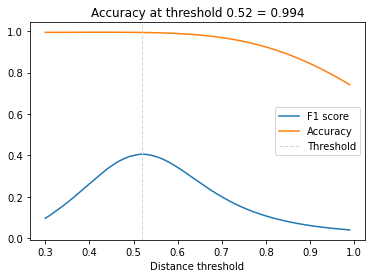

In [19]:
distances = np.array(distances)
identical = np.array(identical)

thresholds = np.arange(0.3, 1.0, 0.01)

f1_scores = [f1_score(identical, distances < t) for t in thresholds]
acc_scores = [accuracy_score(identical, distances < t) for t in thresholds]

opt_idx = np.argmax(f1_scores)
# Threshold at maximal F1 score
opt_tau = thresholds[opt_idx]
# Accuracy at maximal F1 score
opt_acc = accuracy_score(identical, distances < opt_tau)

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, f1_scores, label='F1 score');
plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:.2f} = {opt_acc:.3f}');
plt.xlabel('Distance threshold')
plt.legend();

The threshold is found to be 0.554.

In [54]:
len(distances)

14358182

In [ ]:
img = cv2.imread(m.image_path())
img = cv2.resize(img, (224, 224))
img = np.asarray(img, dtype=np.float64)
img = preprocess_input1(img)
embedded[i] = model.predict(np.expand_dims(img, axis=0))[0]

In [35]:
import random

In [173]:

a, p, n = data_generator[0]

In [23]:
data_generator.__len__()

3

Using SVM Classifier for prediction of faces:

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
img_paths[0]

'/content/PINS/pins_Anna Gunn/Anna Gunn121_2331.jpg'

Saving the target labels in a separate array:

In [82]:
targets = np.array([m.name for m in metadata])

In [55]:
targets

array(['pins_Anna Gunn', 'pins_Anna Gunn', 'pins_Anna Gunn', ...,
       'pins_millie bobby brown', 'pins_millie bobby brown',
       'pins_millie bobby brown'], dtype='<U29')

In [58]:
img_paths[0].split('/')[3]

'pins_Anna Gunn'

In [60]:
img_paths1=[]
for i in range(len(img_paths)):
  print(img_paths[i].split('/')[3])
  img_paths1.append(img_paths[i].split('/')[3])

Streaming output truncated to the last 5000 lines.
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Jon Bernthal
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten Ritter
pins_Krysten 

In [62]:
targets1 = np.array(img_paths1)

In [63]:
targets1

array(['pins_Anna Gunn', 'pins_Anna Gunn', 'pins_Anna Gunn', ...,
       'pins_millie bobby brown', 'pins_millie bobby brown',
       'pins_millie bobby brown'], dtype='<U29')

Encoding the target labels:

In [83]:
encoder = LabelEncoder()
encoder.fit(targets)

# Numerical encoding of identities
y = encoder.transform(targets)



In [65]:
y.shape

(10112,)

Saving the train and test indices in separate lists to separate data and train and test inputs:
Here data with odd indices are saved in the train list which even indices are saved in the test list.

In [96]:
train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

In [66]:
train_idx1 = np.arange(len(img_paths)) % 2 != 0
test_idx1 = np.arange(len(img_paths)) % 2 == 0

In [41]:
train_idx1

array([False,  True, False, ...,  True, False,  True])

In [ ]:
train_idx = np.arange(metadata.shape[0]) % 2 != 0
test_idx = np.arange(metadata.shape[0]) % 2 == 0

Comparing the performance of the SVM without PCA on the embedding vectors obtained from the VGG network and the inception networks respectively:

In [97]:
X_train = embedded2[train_idx]
# 50 test examples of 10 identities (5 examples each)
X_test = embedded2[test_idx]

In [67]:
X_train1 = np.array(embedded_nn1)[train_idx1]
# 50 test examples of 10 identities (5 examples each)
X_test1 = np.array(embedded_nn1)[test_idx1]

In [51]:
X_test1

array([[ 0.15168557,  0.04148319, -0.06835232, ..., -0.44849563,
        -0.22906831, -0.42070127],
       [ 0.6487107 , -0.7547504 , -0.9717866 , ..., -0.43125018,
         0.4869392 ,  0.02820696],
       [ 0.8096458 , -0.6090255 , -1.9991994 , ..., -0.49041882,
        -0.08633265, -0.43672878],
       ...,
       [-0.12369372,  0.20436442,  0.43758723, ...,  0.6612498 ,
         0.6465348 ,  0.1736534 ],
       [ 0.26179865, -0.6961348 , -0.35729918, ...,  0.08383086,
        -0.49301457, -0.4718706 ],
       [-0.35143042, -0.10248581, -0.6962171 , ..., -0.4642103 ,
        -0.13836387,  0.32151002]], dtype=float32)

Saving the encoded labels in output train and test arrays:

In [98]:
y_train = y[train_idx]
y_test = y[test_idx]


Defining the SVM Classifier using C=10:

In [74]:
svc = SVC(C=10)

Fitting SVM on the data obtained from VGG predicted embedding vectors:

In [351]:
svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Generating the accuracy score from predictions made on the test data:

In [ ]:
acc_svc = accuracy_score(y_test, svc.predict(X_test))

In [ ]:
acc_svc

0.9143918291550603

Fitting the SVM classifier on the embedding vectors obtained from the inception network:

In [75]:
svc.fit(X_train1, y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred1=svc.predict(X_test1)

In [77]:
y_pred1

array([23, 37,  4, ...,  7, 90, 90])

Obtaining the accuracy score from predictions made on the test data:

In [78]:
acc_svc = accuracy_score(y_test1, y_pred1)
acc_svc

0.8447389240506329

As seen above, the SVM performs better on the embedding vectors obtained from the VGG network.

Using Logistic Regression as the Classifier and fitting on the data obtained from the inception network:

In [79]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Obtaining the accuracy score using test data predictions:

In [80]:
acc_lr=accuracy_score(y_test1, lr.predict(X_test1))
acc_lr

0.8457278481012658

Fitting the logistic classifier on the vectors obtained from the VGG network:

In [227]:
lr=LogisticRegression(max_iter=5000)

In [228]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Obtaining the accuracy score:

In [229]:
acc_lr=accuracy_score(y_test, lr.predict(X_test))

In [230]:
acc_lr

0.9394614670380688

As seen above, the logistic regression trained on the vectors obtained from VGG performs better than that trained on the vectors obtained from inception network. It also performs slightly better as compared to the SVM Classifier.

In [103]:
with np.printoptions(threshold=np.inf):
  print(confusion_matrix(y_test, lr.predict(X_test)))

[[41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Generating a sample prediction:

/content/PINS/pins_Natalie Portman /Natalie Portman 56.jpg


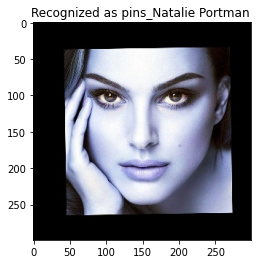

In [77]:
example_idx = 403

example_image = cv2.imread(str(metadata[test_idx][example_idx].image_path()))
print(str(metadata[test_idx][example_idx]))
example_prediction = svc.predict([embedded[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');

As seen above the image has been identified and predicted correctly.

ii) Using PCA:

Obtaining the cumulative variance plot to infer the reduced number of components that can be used which provide more tha 95% variance:

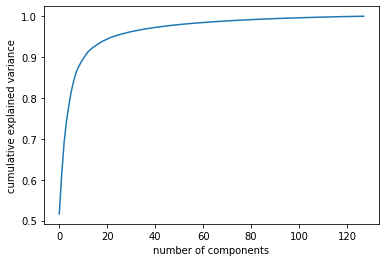

In [358]:
from sklearn.decomposition import PCA
pca = PCA().fit(embedded2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


As seen above, 95% variance is reached using 60 components following which very minor changes can be observed with increase in components.

The PCA below is fit using 100 components:

In [360]:
pca = PCA(n_components=100)
pca.fit(embedded2)
X_pca = pca.transform(embedded2)

Splitting the PCA data using test size of 0.5:

In [361]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.5)

In [362]:
y_train.shape

(5385,)

Defining the SVM classifier using C=10 and fitting the classifier using train input and outputs:

In [363]:
svc_pca=SVC(C=10)

In [364]:
svc_pca.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Obtaining the accuracy from predictions on the test data:

In [365]:
acc_svc = accuracy_score(y_test, svc_pca.predict(x_test))

In [366]:
acc_svc

0.9054781801299907

The accuracy obtained above is around 90.54%

In [12]:
!unzip '/content/Part 2 Test Images.zip'

Archive:  /content/Part 2 Test Images.zip
  inflating: Part 2 Test Images/Part_2_-_Test_Image_-_Dwayne_Johnson4.jpg  
  inflating: Part 2 Test Images/Part_2-_Test_Image_-_Benedict_Cumberbatch9.jpg  


Displaying the test images to be predicted:

In [139]:
img_test1=cv2.imread('/content/Part_2-_Test_Image_-_Benedict_Cumberbatch9.jpg')
img_test1 = cv2.resize(img_test1, (224, 224))
img_test1=np.array(img_test1,dtype='float64')
img_preprocess=preprocess_input1(img_test1)

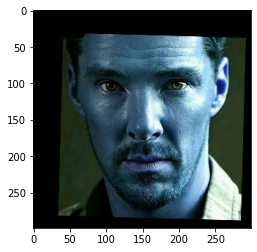

In [151]:
img_test1=cv2.imread('/content/Part_2-_Test_Image_-_Benedict_Cumberbatch9.jpg')
plt.imshow(img_test1)

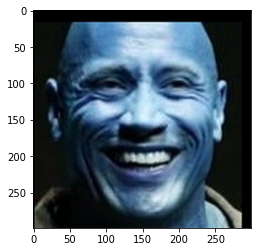

In [13]:
img_test2=cv2.imread('/content/Part 2 Test Images/Part_2_-_Test_Image_-_Dwayne_Johnson4.jpg')
plt.imshow(img_test2)

In [295]:
img_test1=cv2.imread('/content/Part_2-_Test_Image_-_Benedict_Cumberbatch9.jpg')
img_test1 = cv2.resize(img_test1, (224, 224))
img = np.asarray(img_test1, dtype=np.float64)
#img=img/255
img = preprocess_input1(img)

In [213]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

Preprocessing the images as per the requirements for VGG model to generate the corresponding embedding vectors:

In [342]:
img = preprocess_image('/content/Part_2-_Test_Image_-_Benedict_Cumberbatch9.jpg')
img1 = preprocess_image('/content/Part_2_-_Test_Image_-_Dwayne_Johnson4.jpg')

In [287]:
img.shape

(224, 224, 3)

In [297]:
img=img.reshape(1,224,224,3)

array(['pins_alycia debnam carey face', 'pins_alycia debnam carey face',
       'pins_alycia debnam carey face', ..., 'pins_Robert Knepper',
       'pins_Robert Knepper', 'pins_Robert Knepper'], dtype='<U29')

Generating the embedding vectors for both images:

In [352]:
emb_test1=model.predict(img)

In [353]:
emb_test2=model.predict(img1)

Predicting the labels for the embedding vectors obtained above for the images:

In [354]:
y_pred=svc.predict(emb_test1)
y_pred1=svc.predict(emb_test2)

In [355]:
print(y_pred)
print(y_pred1)

[5]
[19]


Obtaining the labels through inverse transform of encoded values:

In [356]:
example_identity = encoder.inverse_transform(y_pred)[0]
example_identity1 = encoder.inverse_transform(y_pred1)[0]

In [357]:
print(example_identity)
print(example_identity1)

pins_Benedict Cumberbatch
pins_Dwayne Johnson


The above labels have been predicted correctly as seen above.

Implementing PCA transformation for the generated vectors:

In [369]:
x_img_pca = pca.transform(emb_test1)
x_img_pca1 = pca.transform(emb_test2)

In [370]:
x_img_pca.shape

(1, 100)

Predicting the labels using the PCA transformed vectors using the SVM Classifier trained on the PCA transformed data:

In [372]:
y_pred_pca=svc_pca.predict(x_img_pca)
y_pred_pca1=svc_pca.predict(x_img_pca1)

In [374]:
y_pred_pca1

array([19])

In [ ]:
print(y_pred_pca)
print(y_pred_pca1)

[5]
[19]


Carrying out hyperparameter tuning to find the optimal parameters:

In [81]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [100]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   8.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   8.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   8.9s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   2.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   2.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   2.4s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 22.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

Obtaining the best parameters:
The best parameters are C-10,gamma-0.001 and kernel='rbf'

In [101]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Building the SVM Classifier using the optimal parameters:

In [102]:
svc_tuned = SVC(C=10,gamma=0.001,kernel='rbf')

In [103]:
svc_tuned.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Obtainin the accuracy score from prediction using test data:

In [104]:
acc_svc_tuned=accuracy_score(y_test,svc_tuned.predict(X_test))

In [105]:
acc_svc_tuned

0.9396471680594243

Conclusions:
Part 1:
The Mobilenet architecture along with data augmentation was found to perform the best as compared to other networks. Using upsampling along with convolution was found to yield better results than just using upsampling alone.
The data samples were less in number as a result of which validation dice coefficient was low and overfitting could aso be observed.
Part 2:
The SVM trained using VGG network embedding vectors was found to be better than that obtained using inception network. 